In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import random
import patsy
import statsmodels.api as sm
import sklearn.linear_model as linear
from tabulate import tabulate

In [4]:
sns.set(style="whitegrid")

In [5]:
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)

In [6]:
seed = 6856486
set_seed( seed )

## Domain Knowledge

The source dataset is from the UCI Machine Learning Repository, from the Center for Machine Learning and Intelligent Systems at the Bren School of Information and Computer Science a the University of California, Irvine.  In collaboration with Rexa.info at the University of Massachusetts Armherst.  The original datasets and information can be found at:  https://archive.ics.uci.edu/ml/datasets/Wine+Quality

The original data is from:  
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

The two datasets are related to red and white variants of the "Vinho Verde" wine from the north of Portugal.  
Vinho verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer). More details can be found at: http://www.vinhoverde.pt/en/

**Variable Properties:**  
The Input variables (based on physicochemical properties):  
   1 - fixed acidity (g / dm^3)  - Continuous  
   2 - volatile acidity (g / dm^3)  - Continuous  
   3 - citric acid (g / dm^3)  - Continuous  
   4 - residual sugar (g / dm^3)  - Continuous  
   5 - chlorides (g / dm^3)  - Continuous  
   6 - free sulfur dioxide (mg / dm^3)  - Continuous  
   7 - total sulfur dioxide (mg / dm^3)  - Continuous  
   8 - density (g / cm^3)  - Continuous  
   9 - pH  (from 0 to 14)  - Continuous  
   10 - sulphates (potassium sulphate - g / dm3)  - Continuous    
   11 - alcohol (% by volume)  - Continuous  
Output variable (based on expert grades):    
   12 - quality (from 0 and 10) - Discrete    

Quality:  
The quality variable's goal is to model wine quality based on physicochemical tests.  (https://archive.ics.uci.edu/ml/datasets/Wine+Quality).  
It is composed of the median of at least 3 evaluations made by wine experts.  
Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).  

Fixed Acidity:  
In this dataset Fixed Acidity refers to Tartaric Acid.  
Tartaric acid contributes a tartness flavour to wine, along with effecting the colour, and chemical stability (through its acidity).  
(https://wineguy.nz/index.php/glossary-articles-hidden/725-tartaric-acid).  
The acids in wine are an important component in both winemaking and the finished product of wine. They are present in both grapes and wine, having direct influences on the color, balance and taste of the wine.  
Most of the acids involved with wine are fixed acids with the notable exception of acetic acid,  
Along with malic acid, and to a lesser extent citric acid, tartaric is one of the fixed acids found in wine grapes.  
During the course of winemaking and in the finished wines, acetic, butyric, lactic, and succinic acids can play significant roles.  (https://en.wikipedia.org/wiki/Acids_in_wine).  
Most acids in wine are fixed and nonvolatile (do not evaporate).  

Volatile Acidity:  
Acetic Acid.  
A measure of volatile acidity is used routinely as a indicator of wine spoilage, with increases usually attributed to microbial production of certain low molecular weight acids and their esters. Volatile Acidity is generally interpreted as meaning acetic acid content (in grams per liter).   (https://link.springer.com/chapter/10.1007/978-1-4615-8146-8_5).  
Acetic acid is mostly found in vinegar, is volatile, and can contribute to the wine fault known as volatile acidity.  
Acetic acid is a two-carbon organic acid produced in wine during or after the fermentation period. It is the most volatile of the primary acids associated with wine and is responsible for the sour taste of vinegar. During fermentation, activity by yeast cells naturally produces a small amount of acetic acid.  
An excessive amount of acetic acid is considered a wine fault, due to its unpleasent vinegar taste.  
A taster's sensitivity to acetic acid will vary, but most people can detect excessive amounts at around 600 mg/L.
(https://en.wikipedia.org/wiki/Acids_in_wine)    

Citric Acid:  
Citric acid is only found in very minute quantities in wine grapes.  
The citric acid most commonly found in wine is commercially produced acid supplements derived from fermenting sucrose solutions.  Citric acid can add "freshness" and a citric flavour to wines.  
These inexpensive supplements can be used by winemakers in acidification to boost the wine's total acidity.  
It is used less frequently than tartaric and malic due to the aggressive citric flavors it can add to the wine.  
When citric acid is added, it is always done after primary alcohol fermentation has been completed due to the tendency of yeast to convert citric into acetic acid.  
(https://en.wikipedia.org/wiki/Acids_in_wine)  

Residual Sugar:  
Glucose and Fructose.  
The amount of sugar remaining after fermentation stops.  
It’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.  
Grapes naturally produce a mixture of glucose and fructose.  
Adding sugar to unfermented grape must to increase alcohol and RS is illegal in Portugal, so we can assume that our RS only comes from the grapes themselves.  (https://en.wikipedia.org/wiki/Chaptalization).  
Bone Dry: 0-1 gram per Liter Residual Sugar.  
Dry:  0-10 g/L RS.   
Off-Dry:  10-20 g/L RS.  
Medium-Sweet:  20-70 g/L RS.  
Sweet:  70+ g/L RS.  					
(https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/).  

Chlorides:  
Sodium Chloride, the amount of salt in the wine.  
The higher the chlorides the saltier the wine will taste.  
People usually do not enjoy salty wines, so we expect quality to decrease as chlorides increase.

Total Sulfur Dioxide:  
The amount of free and bound forms of S02.  
A corollary of this is that the ratio of the free and bound forms of SO2 can provide important information about the state of both white and red wines. SO2 binds very strongly to acetaldehyde and microorganisms present in wine. Thus if a wine contains a very high proportion of bound SO2 compared to free SO2, it can be an indicator that oxidation or microbial spoilage has occurred.  
(https://www.awri.com.au/industry_support/winemaking_resources/fining-stabilities/microbiological/avoidance/sulfur_dioxide/).  

Free Sulfur Dioxide:  
The free form of SO2 which exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion.  
SO2 helps to prevent microbial growth and the oxidation of wine, keeping it clean and fresh.  
SO2 is mostly undetectable in wine in low concentrations, but free SO2 concentrations over 50 ppm become evident in the nose (aroma) and taste of wine.  
Too much free SO2 gives off a bad chemically smell.  
The amount of SO2 in the free form, and the effectiveness of the free SO2, depends on the pH of the wine. The higher the pH, the less free SO2, which is the useful form.  
(https://www.awri.com.au/industry_support/winemaking_resources/fining-stabilities/microbiological/avoidance/sulfur_dioxide/).  

Sulphates:  
Potassium Sulphate is a wine additive which can contribute to sulfur dioxide gas (S02) levels.  
It acts as an antimicrobial and antioxidant.  
Sulphates are a very weak base (https://note.blogdns.com/is-sulphate-acidic-or-basic) 
Potassium Sulphate has a bitter, salty taste.  (https://en.wikipedia.org/wiki/Potassium_sulfate)

Density:  
The density of wine is close to that of water depending largely on the percent alcohol and sugar content.  
A wine denser than water will be thick and syrupy, which people usually do not enjoy.   
So we expect for quality to decrease as density increases.  
  
Water has a density of 1 gram (g) per cubic centimeter (cc).  
Alcohol has a density of 0.79g/cc.  
Tartaric Acid - 1.79 g/cc.    
Malic Acid - 1.61 g/cc.  
Citric Acid - 1.67 g/cc.  
Acetic Acid - 1.049 g/cc.  
Glucose - 1.56 g/cc.   
Fructose - 1.6 g/cc.  
Sodium Chloride - 2.17 g/cc.   
Sulphur Dioxide - 1.5 g/cc.  
Potassium Sulphate - 2.66 g/cc.  

pH:  
Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).  
Most wines are between 3-4 on the pH scale.  
White Wines are usually more acidic, between 3.0 and 3.4.  
Red Wines are usually less acidic, between 3.3 and 3.6.  
pH is on a log scale, meaning there is a 10x difference between a pH of 3.0 and 4.0.  
Wines with lower acidity (higher pH) are more prone to bacterial problems.  
Even slight changes to a wines pH can affects its smell, colour, and taste.  
(https://sensorex.com/2017/12/06/ph-improve-taste-color-wine/).  
A higher pH will have a softer more round mouth feel.  

Alcohol:  
Alcohol content effects the aroma, taste, and texture of wine in critical ways, as it is the evaporating alcohol which carries the aroma of wine.  
The sugar content of the grapes determines alcohol content.  
Wines with a higher alcohol content tend to have a rich, ripe fruit flavors.  
Alcohol also adds viscosity to wine and helps to balance the sweetness and acidity.  
But too much alcohol can dampen the flavors and aromas, making a wine seem “hot” on the palate.  
(https://www.tennessean.com/story/life/food/2015/04/17/alcohol-content-affect-wine/25779589/).  
Sugars are consumed in the fermentation process by yeast to produce alcohol.  Wines with a high amount of sugar typically have a higher amount of alcohol.  

Wine Type:  
Red wine or White Wine.  
As the quality of wine is a very difficult to pinpoint, the type/colour of wine can influence a persons expectations and perception of quality. 

There are 3 primary acids in wine:  Tartaric acid, Citric Acid, and Malic Acid.  
Fixed_Acidity usually refers to these three acids, but with this dataset Fixed Acidity is actually measuring Tartaric Acid.  
So one of our three primary acids, Malic Acid, is not repesented in our dataset yet still has an effect and represents a confounding variable in our analysis.

Causal Loop Diagram:  

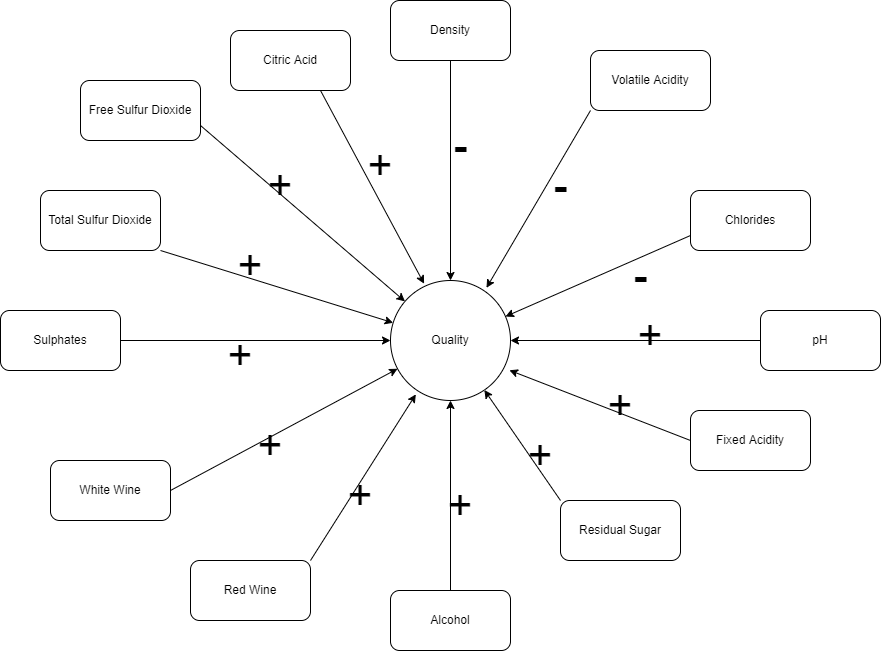

This Causal Loop Diagram contains the interactions that we found to be significant to a potential final model.  

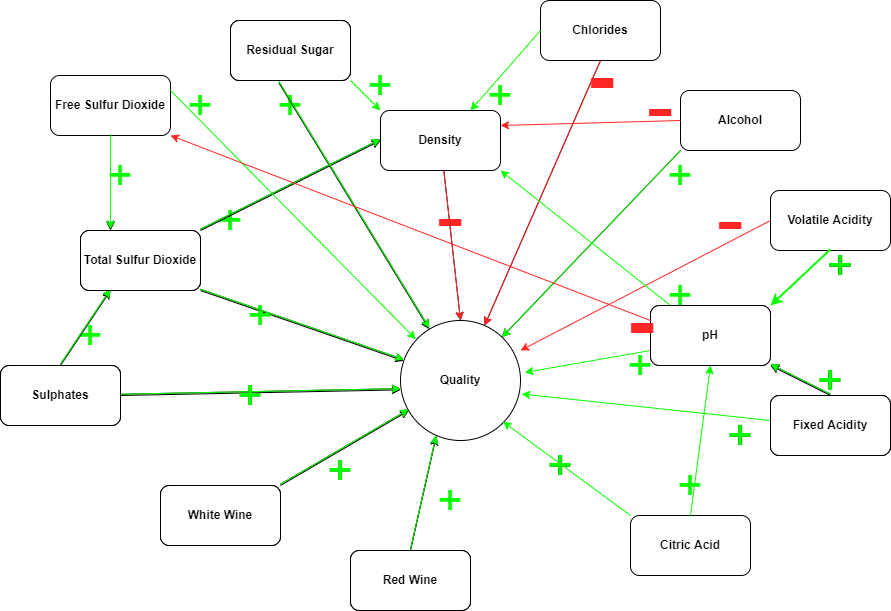

## ETL ( Extract, Transform, Load )

wine_quality_ETL.py contains the ETL for our data

In [ ]:
!python wine_quality_ETL.py

## GET the Data

Make a connection to our database

In [7]:
connection = sqlite3.connect('wine_quality.db')

Create a dtype for a structured numpy array

In [8]:
def create_dtype_from_SQL( input_inquiry, skip = 0 ):
    new_dtype = []
    for feature in range( len( input_inquiry ) - skip ):
        if input_inquiry[ feature + 1 ][2] == 'INT' or input_inquiry[ feature + 1 ][2] == 'INTEGER':
            new_dtype.append( ( input_inquiry[ feature + 1 ][1], '<i8' ) )
        if input_inquiry[ feature + 1 ][2] == 'NUMERIC' or input_inquiry[ feature + 1 ][2] == 'DECIMAL' or input_inquiry[ feature + 1 ][2] == 'FLOAT':
            new_dtype.append( ( input_inquiry[ feature + 1 ][1], '<f8' ) )
        if input_inquiry[ feature + 1 ][2] == 'STR' or input_inquiry[ feature + 1 ][2] == 'STRING':
            new_dtype.append( ( input_inquiry[ feature + 1 ][1], 'U10' ) )
    return new_dtype

In [9]:
SQL_query_dtype = """
    PRAGMA table_info( wine_quality );
    """
inquiry_dtype = list(connection.execute(SQL_query_dtype ) )
new_dtype = create_dtype_from_SQL( inquiry_dtype, skip = 1 )

SQL command to retrieve our data from the data warehouse

In [10]:
SQL_query1 = """
    SELECT quality, Red_Wine, White_Wine, wine_type, fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides
        , free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol
    FROM wine_quality
    """

Create a structured numpy array with our data

In [11]:
wine_quality = np.array( list( connection.execute( SQL_query1 ) ), dtype = new_dtype )

Convert our Structured Numpy Array to a Pandas DataFrame

In [12]:
wine = pd.DataFrame( wine_quality )

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) can be described as an approach/philosophy for data analysis which utilizes a variety of techniques to:   
1. Maximize insight into the data set;
2. Uncover underlying structure;
3. Extract important variables;
4. Detect outliers and anomalies;  
5. Test underlying assumptions;  
6. Develop parsimonious (“frugal”) models;  
7. Determine optimal factor settings.  
(source:  https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm).   
  
Steps 5, 6 and 7 will be done in the Linear Regression portion of the next Modeling phase.  

**Single Variable EDA**

We shall start with individually checking each variable.  

**EDA for quality**

Lets take a look at the descriptive statistics for our target variable (quality)

In [13]:
#   Based off of code from: https://stackoverflow.com/questions/16330831/most-efficient-way-to-find-mode-in-numpy-array
def the_mode( input_data ):
    x = input_data.copy()
    vals, counts = np.unique(x, return_counts=True)
    index = np.argmax(counts)
    return vals[index]

In [14]:
def descriptive_stats_single_variable( input_data ):
    ##  IQR is Interquartile Range
    ##  QCV is quantile conditional variance
    ##  CV  is Coefficient of Variation
    dataset = input_data.copy()
    try:
        mean = sum( dataset ) / len( dataset )
        variance = sum( ( dataset - np.mean( dataset ) )**2 ) / ( len( dataset ) - 1 )
        stndev = np.sqrt (variance )
        mode = the_mode( input_data )
        minimum_value = min( dataset )
        Q1 = np.percentile( dataset, 25)
        median = np.median( dataset )
        Q3 = np.percentile( dataset, 75)
        maximum_value = max( dataset )
        value_range = maximum_value - minimum_value
        IQR = Q3 - Q1
        QCV = IQR / median
        # CV non-biased estimator is based off of:  https://en.wikipedia.org/wiki/Coefficient_of_variation
        observations = len( dataset )
        CV =  ( 1 + 1 / (4 * observations) ) * ( stndev / mean )
    except:
        return print( "Error in setting up initial variables." )
    descriptive_statistics = [ ('Mean', mean), ('Variance', variance), ('Standard Deviation', stndev), ('count', observations), ('mode', mode), ('Minimum', minimum_value), ('Q1', Q1), ('Median', median), ('Q3', Q3), ('Maximum', maximum_value), ('Range', value_range), ('IQR', IQR), ('QCV', QCV), ('CV', CV) ]
    return descriptive_statistics

In [15]:
descriptive_stats_single_variable( wine_quality['quality'] )

[('Mean', 5.818377712790519),
 ('Variance', 0.7625747692568745),
 ('Standard Deviation', 0.873255271531111),
 ('count', 6497),
 ('mode', 6),
 ('Minimum', 3),
 ('Q1', 5.0),
 ('Median', 6.0),
 ('Q3', 6.0),
 ('Maximum', 9),
 ('Range', 6),
 ('IQR', 1.0),
 ('QCV', 0.16666666666666666),
 ('CV', 0.15009147169344245)]

The highest quality of wine in this dataset is 9, with the lowest graded quality of wine being a 3.  
The median and mode quality were both 6, with the mean being close at 5.8.  This distribution may be left skewed, as the mean is less than the median.  
The min value is over 3 standard deviations from the mean, while the max value is also over 3 standard deviations from the mean, indicating that the variable may be normally distributed.  

So we will now examine the distribution graphically to help assess its distribution.

In [16]:
def density_hist_plot( input_data, input_bins = None, distribution = "normal" ):
    data = np.array( input_data.copy() )
    if input_bins is None:
        try:
            bin_size = freeman_diaconis( data )
            minimum = np.min( data )
            maximum = np.max( data )
        except:
            return print("error with input_bins parameters")
        input_bins = create_bins( minimum, maximum, bin_width = bin_size )
    try:
        data_mean = np.mean( data )
        data_std  = np.std( data )
    except:
        return print("error with getting mean and std")

    figure = plt.figure(figsize=(10,6))
    axes = figure.add_subplot(1, 1, 1)
    n, bins, patches = axes.hist( data, color="DimGray", density=True, bins=input_bins, alpha=0.75 )
    xs = [(b2 + b1)/2 for b1, b2 in zip( bins, bins[1:]) ]

    if distribution == "normal":
        ys = [ stats.norm.pdf( k, loc=data_mean, scale=data_std) for k in xs ]
    elif distribution == "gamma":
        ys = [ stats.gamma.pdf( k, loc=data_mean, scale=data_std) for k in xs ]
    elif distribution == "exponential":
        ys = [ stats.expon.pdf( k, loc=data_mean, scale=data_std) for k in xs ]
    else:
        return print( "error with distribution selection" )

    axes.set_xlabel( "units" )
    axes.set_ylabel( "Density" )
    axes.set_title("Density Histogram with Normal plot")
    axes.plot(xs, ys, color="darkred")
    plt.show()
    plt.close()

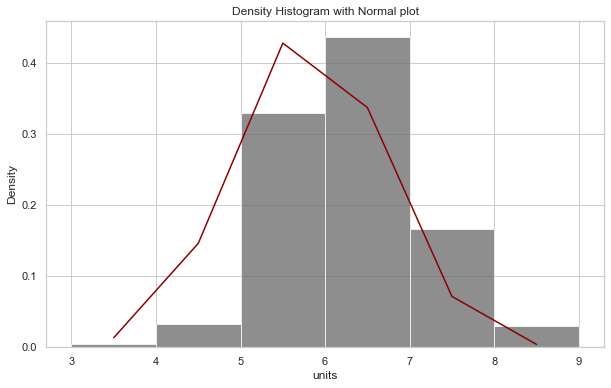

In [17]:
density_hist_plot( wine_quality["quality"], [3, 4, 5, 6, 7, 8, 9 ] )

Quality does appear to be fairly normally distributed

In [18]:
def empirical_vs_theoritical( input_data, column_name = None, distribution = "normal" ):
    if column_name is None:
        dataset = input_data.copy()
    elif isinstance( column_name, str ) is True:
        dataset = input_data[column_name].copy()
    else:
        return print( "error with creating data copy" )

    try:
        min_value = np.min( dataset )
        max_value = np.max( dataset )
        mean = np.mean( dataset )
        std = np.std( dataset )
        observations = len( dataset )
    except:
        return print( "error with inputing initial values" )

    empirical_weights = np.ones( observations )/ observations
    values, base = np.histogram( dataset, bins=11, weights=empirical_weights)
    cumulative = np.cumsum(values)
    
    figure = plt.figure(figsize=(20, 8))
    axes = figure.add_subplot(1, 2, 1)
    axes.plot(base[:-1], cumulative, color="steelblue")
    axes.set_xlim((min_value, max_value))

    if distribution == "normal":
        sampled_data = [mean + r * std for r in np.random.standard_normal(10000)]
    elif distribution == "exponential":
        sampled_data = [mean + r * std for r in np.random.exponential(10000)]
    elif distribution == "gamma":
        sampled_data = [mean + r * std for r in np.random.gamma(10000)]
    else:
        #   To add more distributions, refer to:  https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator
        return print("error: invalid distribution selected")

    theoretical_weights = np.ones(len(sampled_data))/len(sampled_data)
    values2, base = np.histogram(sampled_data, bins=base, weights=theoretical_weights)
    cumulative2 = np.cumsum(values2)
    axes.plot( base[:-1], cumulative2, color="firebrick")
    axes.set_xlim((min_value, max_value))
    axes.set_ylabel("Percent")
    axes.set_xlabel( "Empirical v. Theoretical: "+ distribution+ " Distribution")

    axes = figure.add_subplot(1, 2, 2)

    differences = cumulative2 - cumulative
    axes.plot(base[:-1], differences, color='firebrick')
    axes.hlines(0, min_value, max_value, linestyles="dotted")
    axes.set_xlabel( "Empirical v. Theoretical: "+ distribution+ " Distribution, Difference")
    axes.set_ylabel("Percentage Points")

    plt.show()
    plt.close()

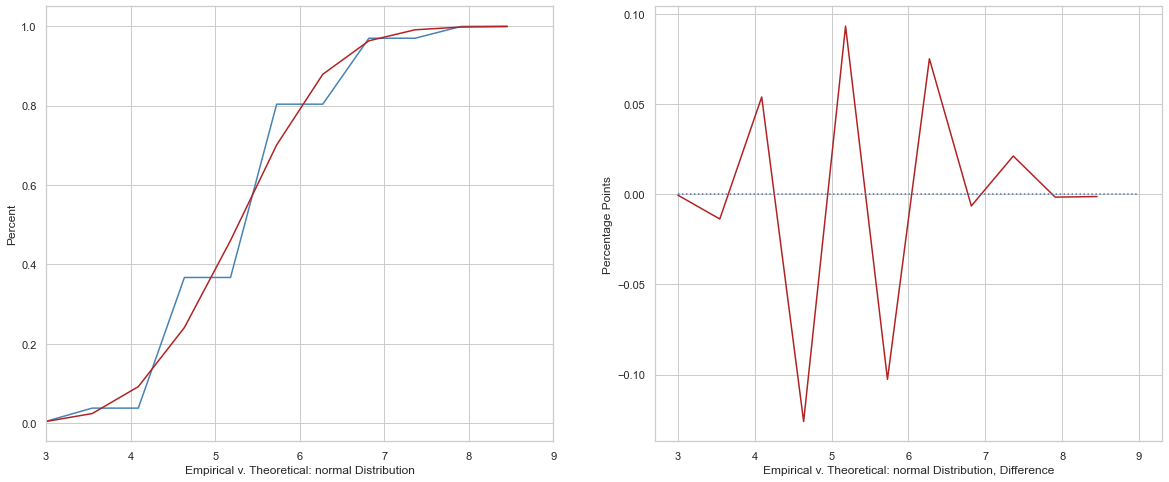

In [19]:
empirical_vs_theoritical( wine_quality["quality"] )

From the left chart we see that Quality's distribution was approximately normally distributed, based on our observed data vs a resampled distribution.  
If this data was continuous instead of discrete, then we could expect it to be an even better fit.  
Most of the differences in the right chart can be explained from the theoretical distribution being a continuous scale, while the empirical distirbution is discrete.  

**EDA for wine_type**

Wine Type is a categorical variable for Red Wine or White White.  

In [20]:
def distribution_by_group(data, name = str, rounding = 1 ):
    X = data[name].value_counts(  )
    X2 = data[name].value_counts( normalize = True )
    print( name, "- count - percentage" )
    for _ in range( len( X.axes[0] ) ):
        print( X.axes[0][_], "-", X.values[_], "-", round( X2.values[_]*100, rounding ), "%"  )

In [21]:
distribution_by_group( wine, "wine_type" )

wine_type - count - percentage
White Wine - 4898 - 75.4 %
Red Wine - 1599 - 24.6 %


This matches our domain knowledge for the number of samples from each original dataset.  

**EDA for fixed_acidity**

Fixed Acidity refers to the concentration of Tartaric Acid.  
Lets take a look at its descriptive statistics

In [22]:
descriptive_stats_single_variable( wine_quality['fixed_acidity'] )

[('Mean', 7.215307064799134),
 ('Variance', 1.6807404883628867),
 ('Standard Deviation', 1.2964337577997909),
 ('count', 6497),
 ('mode', 6.8),
 ('Minimum', 3.8),
 ('Q1', 6.4),
 ('Median', 7.0),
 ('Q3', 7.7),
 ('Maximum', 15.9),
 ('Range', 12.100000000000001),
 ('IQR', 1.2999999999999998),
 ('QCV', 0.1857142857142857),
 ('CV', 0.17968516544305457)]

The lowest amount of fixed acidity in this dataset is 3.8g/dm^3, with the highest amount of fixed acidity is 15.9g/dm^3.  
The mean is 7.2 with the mode and median smaller at 6.8 and 7.0.    This distribution may be right skewed, as the mean is more than the median.  
The min value is less than 4 standard deviations from the mean, while the max value is over 4 standard deviations from the mean, indicating that the variable may be skewed.  

To help us check the distribution of the variable we shall use the free_diaconis and create_bins helper functions to create the bins for our histogram.

In [23]:
#   based off https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
def freeman_diaconis( data ):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return h

In [24]:
def create_bins( min_value, max_value, steps = None, bin_width = None ):
    if bin_width is not None:
        if steps == None:
            steps = int( np.round( ( max_value - min_value ) / bin_width ) )
            #if bin_width < 1:
            #    steps = int( np.round( np.reciprocal( bin_width ) ) )
            #else:
            #    steps = int( np.round( bin_width ) )
        bins = []
        for current_step in range( steps ):
            bins.append( min_value + bin_width * current_step )
    elif bin_width is None:
        bin_width = ( max_value - min_value ) / steps
        bins = []
        for current_step in range( steps + 1 ):
            bins.append( min_value + bin_width * current_step )
    return bins

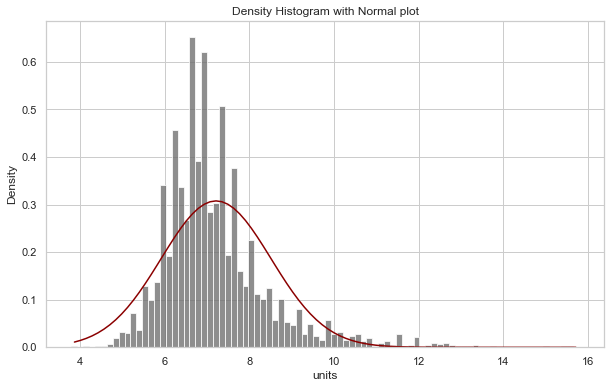

In [25]:
density_hist_plot( wine_quality["fixed_acidity"] )

Fixed Acidity does appear to be rather normally distributed with a skew towards the lower range.

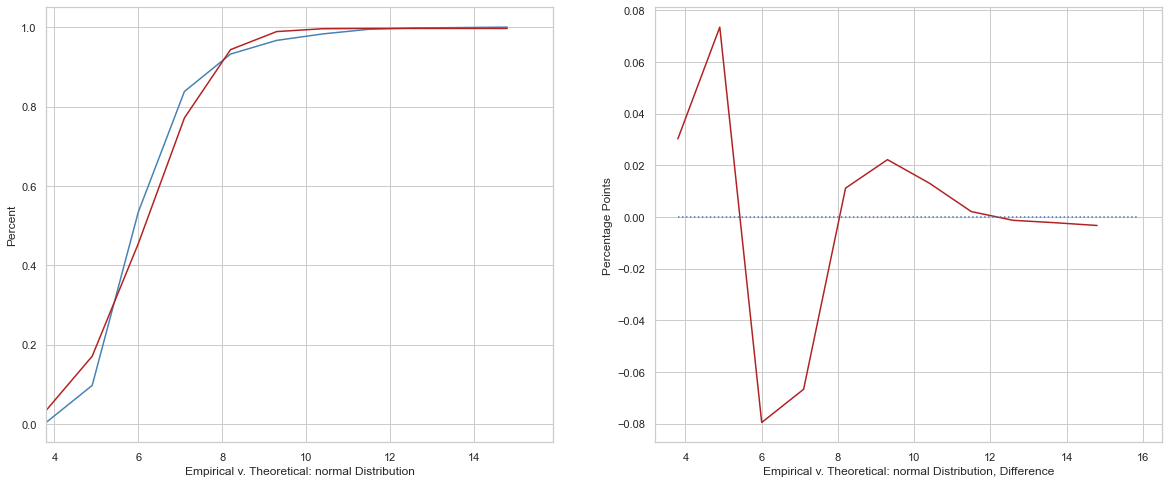

In [26]:
empirical_vs_theoritical( wine_quality["fixed_acidity"] )

When we resample our data and compare it to our original distribution there appears to be issues with the differences between our data and its theoretical resampled distribtuion.  
So we shall examine a PP plot where we graph the empirical values against the theoretical values.

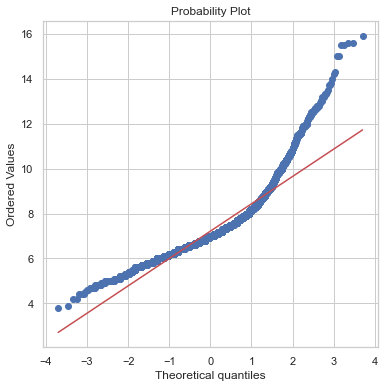

In [27]:
figure = plt.figure(figsize=(6, 6))
axes = figure.add_subplot(1, 1, 1)
stats.probplot( wine[ "fixed_acidity"], dist="norm", plot=axes)
plt.show()
plt.close()

The curve shows that there is definite issues with the normality of the fixed acidity variable.  
We shall examine the effects of various transformations in the Linear Regression portion of the Modeling section.  

**EDA for volatile_acidity**

Volatile Acidity is unwanted in wine, as it is the main ingrediant in vinegar.  

In [28]:
descriptive_stats_single_variable( wine_quality['volatile_acidity'] )

[('Mean', 0.33966599969217015),
 ('Variance', 0.027105168599034286),
 ('Standard Deviation', 0.1646364740846763),
 ('count', 6497),
 ('mode', 0.28),
 ('Minimum', 0.08),
 ('Q1', 0.23),
 ('Median', 0.29),
 ('Q3', 0.4),
 ('Maximum', 1.58),
 ('Range', 1.5),
 ('IQR', 0.17),
 ('QCV', 0.5862068965517242),
 ('CV', 0.48471972269776226)]

The lowest amount of volatile acidity in this dataset is 0.08g/dm^3, with the highest amount of volatile acidity is 1.58g/dm^3.  
The mean and mode are very close at 0.28 and 0.29, with the mean at 0.34.    This distribution may be right skewed, as the mean is more than the median.  
The min value is 0.26 from the mean, while the max value is 1.24 from the mean, indicating that the variable may be skewed and contains outliers.  

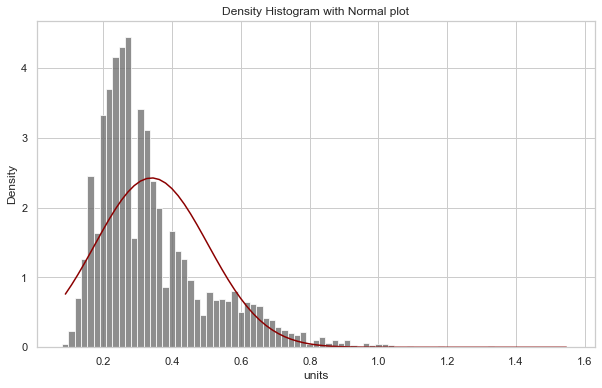

In [29]:
density_hist_plot( wine_quality["volatile_acidity"] )

There is a definite skew to the volatile acidity variable towards 0.

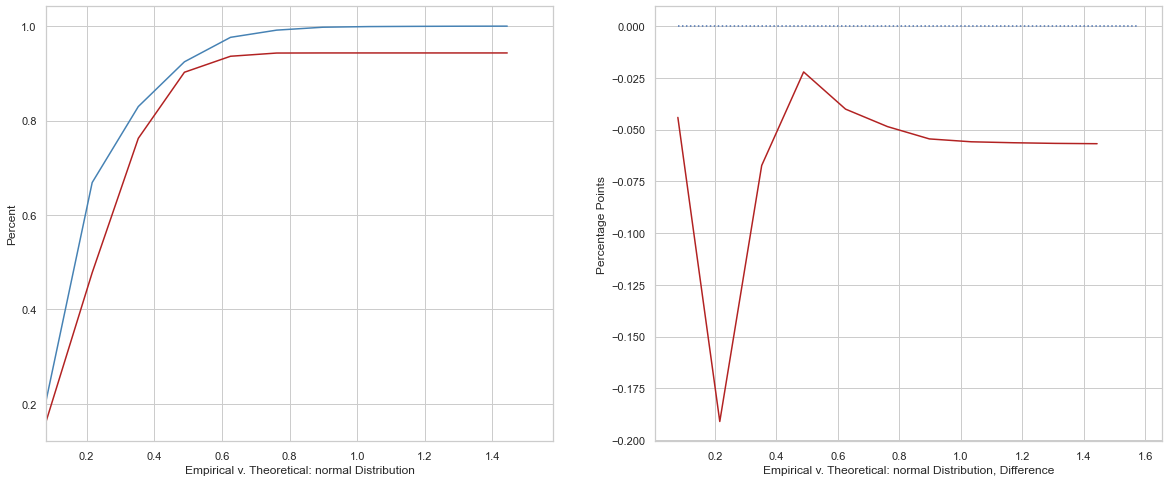

In [30]:
empirical_vs_theoritical( wine_quality["volatile_acidity"] )

Our empirical and theoretical distributions do not match, with great differences across its entire range.

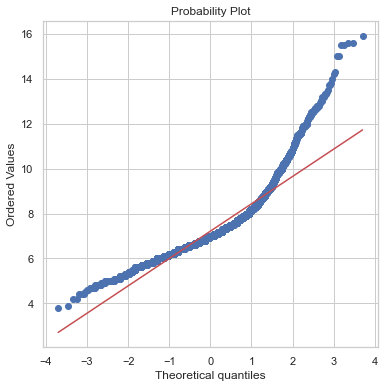

In [31]:
figure = plt.figure(figsize=(6, 6))
axes = figure.add_subplot(1, 1, 1)
stats.probplot( wine[ "fixed_acidity"], dist="norm", plot=axes)
plt.show()
plt.close()

The distribution for volatile acidity has issues with being properly normally distributed, as it is skewed towards 0.
Transformations shall be attempted in the Linear Regression portion of the Modeling Section.  
This skew is acceptable based on our domain knowledge, as volatile acidity is regarded as spoilage with wine and is intentionally kept down at all costs.  

**EDA for citric_acid**

Citric is one of the 3 primary acids in wine, along with malic and tartaric acids.  

In [32]:
descriptive_stats_single_variable( wine_quality['citric_acid'] )

[('Mean', 0.3186332153301454),
 ('Variance', 0.02111728185839421),
 ('Standard Deviation', 0.14531786489758997),
 ('count', 6497),
 ('mode', 0.3),
 ('Minimum', 0.0),
 ('Q1', 0.25),
 ('Median', 0.31),
 ('Q3', 0.39),
 ('Maximum', 1.66),
 ('Range', 1.66),
 ('IQR', 0.14),
 ('QCV', 0.4516129032258065),
 ('CV', 0.4560838281610538)]

The lowest amount of citric acid in this dataset is 0.0 g/dm^3, with the highest amount at 1.66 g/dm^3.  
The mean, median and mode are all close to 0.31.  
The min value just over 2 standard deviations from the mean, while the max value is over 6 standard deviations from the mean, indicating that this variable may be skewed and contain outliers.

To help us access the normality of Citric Acid we shall graph its histogram with a theoretical normal distribution plotted overtop.  

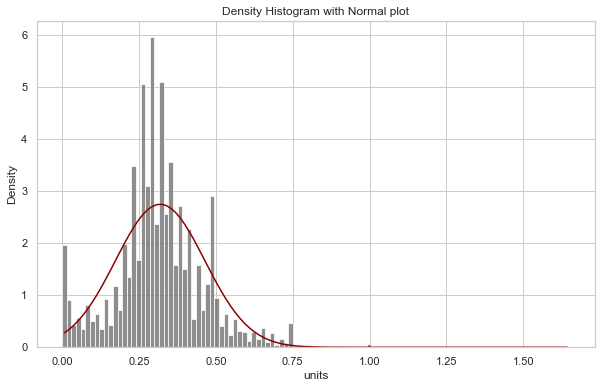

In [33]:
density_hist_plot( wine_quality["citric_acid"] )

Citric Acid does not seem to be a flavour wanted in wines by the Minho region of Northern Portugal.  
As such, we would expect a skew towards 0.

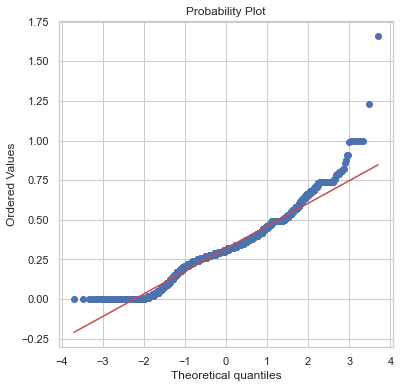

In [34]:
figure = plt.figure(figsize=(6, 6))
axes = figure.add_subplot(1, 1, 1)
stats.probplot( wine[ "citric_acid" ], dist="norm", plot=axes)
plt.show()
plt.close()

There are some issues with the normality of citric acid.  
Transformations were tried in the Linear Regression portion of the Modeling section.  
The skew in this data can be accepted as not all wine regions like citric acid in their wines.  

**EDA for chlorides**

Chlorides represent the salt concentration in a wine, and is usually kept low.

In [35]:
descriptive_stats_single_variable( wine_quality['chlorides'] )

[('Mean', 0.0560338617823606),
 ('Variance', 0.001227353225124378),
 ('Standard Deviation', 0.03503360137245924),
 ('count', 6497),
 ('mode', 0.044),
 ('Minimum', 0.009),
 ('Q1', 0.038),
 ('Median', 0.047),
 ('Q3', 0.065),
 ('Maximum', 0.611),
 ('Range', 0.602),
 ('IQR', 0.027000000000000003),
 ('QCV', 0.574468085106383),
 ('CV', 0.6252460267138014)]

The lowest amount of chlorides in this dataset is 0.009 g/dm^3, with the highest amount at 0.61 g/dm^3.  
The mean is 0.056, while the median and mode are close to 0.0455.    This distribution may be right skewed, as the mean is more than the median.  
The min value is within 2 standard deviations from the mean, while the max value is over 10 standard deviations from the mean, indicating that this variable may be skewed and contain outliers.

To help us assess the normality of chlorides we shall graph its histogram with a theoretical normal distribution plotted overtop.  

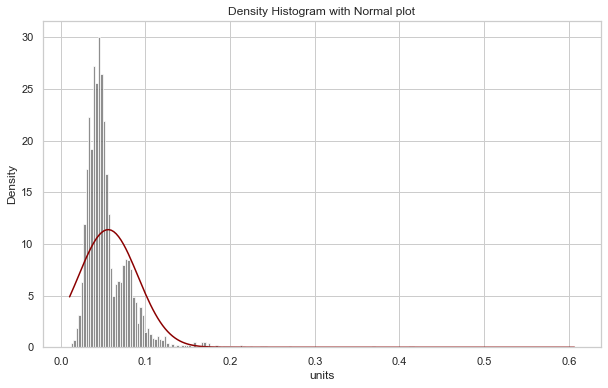

In [36]:
density_hist_plot( wine_quality["chlorides"] )

Chlorides appears to be multi-modal.  
The distribution is has a disproportionate amoutn of values between 0.25 and 0.5.  
It is fairly normally distributed from 0.0 to 0.15.  
There are clearly alot of outliers above 0.2.  
This skew is acceptable as people (generally) do not like salty wines, so we would expect a higher concentration of low chlorides.  
But a wine can be properly balanced even with a higher chloride concentration, so outliers are to be expected.  

**EDA for free_sulfur_dioxide**

Free Sulfur Dioxide is a continuous variable.  

In [37]:
descriptive_stats_single_variable( wine_quality['free_sulfur_dioxide'] )

[('Mean', 30.525319378174544),
 ('Variance', 315.04119226636425),
 ('Standard Deviation', 17.74939977200255),
 ('count', 6497),
 ('mode', 29.0),
 ('Minimum', 1.0),
 ('Q1', 17.0),
 ('Median', 29.0),
 ('Q3', 41.0),
 ('Maximum', 289.0),
 ('Range', 288.0),
 ('IQR', 24.0),
 ('QCV', 0.8275862068965517),
 ('CV', 0.5814872085872217)]

The lowest amount of free sulfur dioxide in this dataset is 1.0 mg/dm^3, with the highest amount at 289.0 mg/dm^3.  
The mean is 30.5, while the median and mode are close to 29.0.    This distribution may be right skewed, as the mean is more than the median.  
The min value is within 2 standard deviations from the mean, while the max value is over 15 standard deviations from the mean, indicating that this variable may be skewed and contain extreme values.

To help us assess the normality of free sulfur dioxide we shall graph its histogram with a theoretical normal distribution plotted overtop.

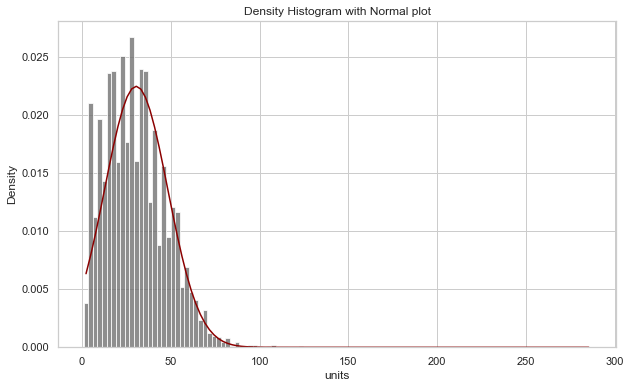

In [38]:
density_hist_plot( wine_quality["free_sulfur_dioxide"] )

As SO2 is indistinguishable at concentrations below 50ppm we are not surprised to see the mean at 30.5 and the majority of the histogram is below 50.  
The drastic drop off from 50 to 100 makes sense as some people are more sensetive to SO2 than others.  
The extreme values, upwards of 289, are very surprising and generally indicate a wine which had faults and needed excessive amounts of SO2.  

**EDA for total_sulfur_dioxide**

Total sulfur dioxide is a continuous variable including free and bound SO2.  

In [39]:
descriptive_stats_single_variable( wine_quality['total_sulfur_dioxide'] )

[('Mean', 115.7445744189626),
 ('Variance', 3194.7200386773793),
 ('Standard Deviation', 56.521854522630264),
 ('count', 6497),
 ('mode', 111.0),
 ('Minimum', 6.0),
 ('Q1', 77.0),
 ('Median', 118.0),
 ('Q3', 156.0),
 ('Maximum', 440.0),
 ('Range', 434.0),
 ('IQR', 79.0),
 ('QCV', 0.6694915254237288),
 ('CV', 0.4883514387406251)]

The lowest amount of total sulfur dioxide in this dataset is 6.0 mg/dm^3, with the highest amount at 440.0 mg/dm^3.  
The mean is 115.7, while the median is 118 and mode is 111.    This distribution may be left skewed, as the mean is less than the median.  
The minimum value is within 2 standard deviations from the mean, while the maximum value is over 5 standard deviations from the mean, indicating that this variable may be skewed.

To help us assess the normality of total sulfur dioxide we shall graph its histogram with a theoretical normal distribution plotted overtop.

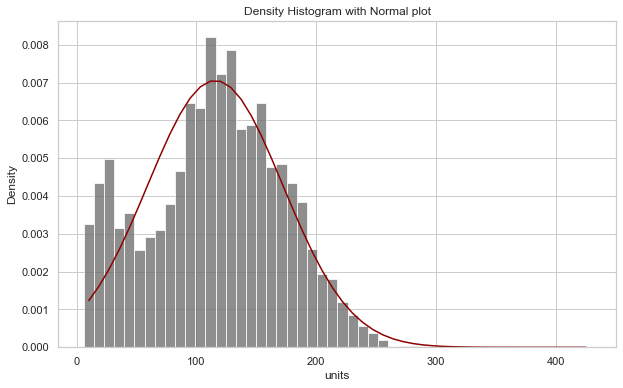

In [40]:
density_hist_plot( wine_quality["total_sulfur_dioxide"] )

Total Sulfur Dioxide is multi-modal with a higher distribution between 0 and 50 compared to the rest of the distribtuion.  
This would indicate that there are a small amount of very clean well made wines with a very low amount of faults, while the majority of the wines follow a normal distribtuion with a mean around 120.  

**EDA for sulphates**

Sulphates is a continuous variable representing potassium sulphate.  

In [41]:
descriptive_stats_single_variable( wine_quality['sulphates'] )

[('Mean', 0.5312682776666163),
 ('Variance', 0.022143188022171217),
 ('Standard Deviation', 0.1488058736144888),
 ('count', 6497),
 ('mode', 0.5),
 ('Minimum', 0.22),
 ('Q1', 0.43),
 ('Median', 0.51),
 ('Q3', 0.6),
 ('Maximum', 2.0),
 ('Range', 1.78),
 ('IQR', 0.16999999999999998),
 ('QCV', 0.3333333333333333),
 ('CV', 0.2801063150498271)]

The lowest concentration of sulpahtes is 0.22 g/dm^3, with the highest at 2.0 g/dm^3.  
The mean is 0.53, the median 0.51, with the mode at 0.5.    This distribution may be right skewed, as the mean is more than the median.  
The minimum value is about 3 standard deviations from the mean, while the maximum value is almost 5 standard deviations from the mean, indicating there might be a slight skew.

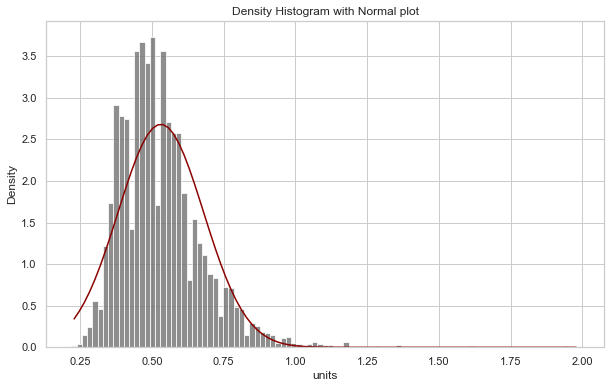

In [42]:
density_hist_plot( wine_quality["sulphates"] )

Sulphates is definitely appears to be skewed left.  

**EDA for density**

Density is a continuous variable with 1 being the density of water.

In [43]:
descriptive_stats_single_variable( wine_quality['density'] )

[('Mean', 0.9946966338309922),
 ('Variance', 8.992039783233373e-06),
 ('Standard Deviation', 0.0029986730037190406),
 ('count', 6497),
 ('mode', 0.9972),
 ('Minimum', 0.98711),
 ('Q1', 0.99234),
 ('Median', 0.99489),
 ('Q3', 0.99699),
 ('Maximum', 1.03898),
 ('Range', 0.05186999999999997),
 ('IQR', 0.004650000000000043),
 ('QCV', 0.004673883544914556),
 ('CV', 0.0030147768561375157)]

The lowest density is 0.987 g/cm^3, with the highest at 1.03 g/cm^3.  
The mean, median and mode are all close together around 0.99.  
The minimum value is within 4 standard deviations from the mean, while the maximum value is over 14 standard deviations from the mean, indicating that this variable may be skewed and contain outliers.

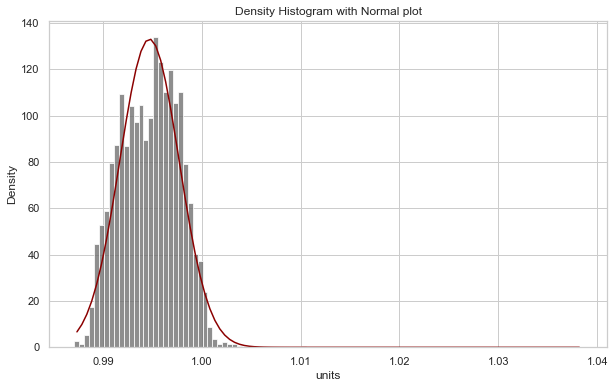

In [44]:
density_hist_plot( wine_quality["density"] )

The Density variable is fairly normally distributed from 0.98 to 1.0 with a few outlies going as far as 1.039.  
Wines with a density less than 1 typically indicate high alcohol and low residual sugar.  

**EDA for pH**

pH is a continuous variable from 0 to 14.  

In [45]:
descriptive_stats_single_variable( wine_quality['pH'] )

[('Mean', 3.2185008465445644),
 ('Variance', 0.02585252436042875),
 ('Standard Deviation', 0.16078720210398822),
 ('count', 6497),
 ('mode', 3.16),
 ('Minimum', 2.72),
 ('Q1', 3.11),
 ('Median', 3.21),
 ('Q3', 3.32),
 ('Maximum', 4.01),
 ('Range', 1.2899999999999996),
 ('IQR', 0.20999999999999996),
 ('QCV', 0.06542056074766354),
 ('CV', 0.04995909485476915)]

The lowest pH is 2.72, with the highest at 4.01.  
The mean and median are about 3.21, with the mode at 3.16.  
The minimum value is about 3 standard deviations from the mean, while the maximum value is almost 5 standard deviations from the mean, indicating there might be a slight skew.  

To help us assess the normality of total sulfur dioxide we shall graph its histogram with a theoretical normal distribution plotted overtop.

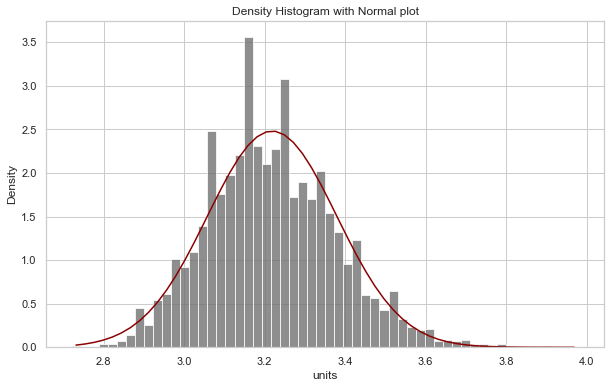

In [46]:
density_hist_plot( wine_quality["pH"] )

pH appears to be normally distributed.  
The mean is around 3.2 is probably because 3/4 of our samples are white wines, and white wines are typically more acid than red wines.  

**EDA for alcohol**

Alcohol is a continuous variable, which should range from 0 to 15%

In [47]:
descriptive_stats_single_variable( wine_quality['alcohol'] )

[('Mean', 10.491800831152855),
 ('Variance', 1.4225613158949257),
 ('Standard Deviation', 1.1927117488710026),
 ('count', 6497),
 ('mode', 9.5),
 ('Minimum', 8.0),
 ('Q1', 9.5),
 ('Median', 10.3),
 ('Q3', 11.3),
 ('Maximum', 14.9),
 ('Range', 6.9),
 ('IQR', 1.8000000000000007),
 ('QCV', 0.17475728155339812),
 ('CV', 0.11368473942436798)]

The lowest alcohol content is 8.0%, with the highest at 14.9%.  
The mean is 10.49%, median is 10.3%, indicating a slight skew left.    
The minimum value is within 3 standard deviations from the mean, while the maximum value is almost 4 standard deviations from the mean, indicating there might be a slight skew.

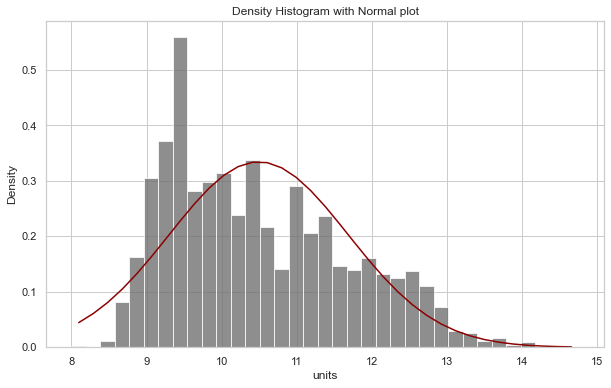

In [48]:
density_hist_plot( wine_quality["alcohol"] )

As we can see the distribution of alcohol is fairly normally distributed with a "bulge" around 9%.  

**Pairwise EDA**

We shall now examine each variable against our target variable (quality).  

**EDA for Quality vs Wine Type**

Lets check the descriptive stats for quality by the type of wine

In [49]:
def describe_by_category( input_data, numeric, categorical, transpose = False):
    data = pd.DataFrame( input_data.copy() )
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [50]:
describe_by_category( wine_quality, "quality", "wine_type" )

             count      mean       std  min  25%  50%  75%  max
wine_type                                                      
Red Wine    1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
White Wine  4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0


Both red and white wines have a similar mean and standard deviation, and quartiles.  
But no redwines scored higher than an 8, while the highest white wine is 9.  

Lets look at the distribution for each type of wine with quality.  

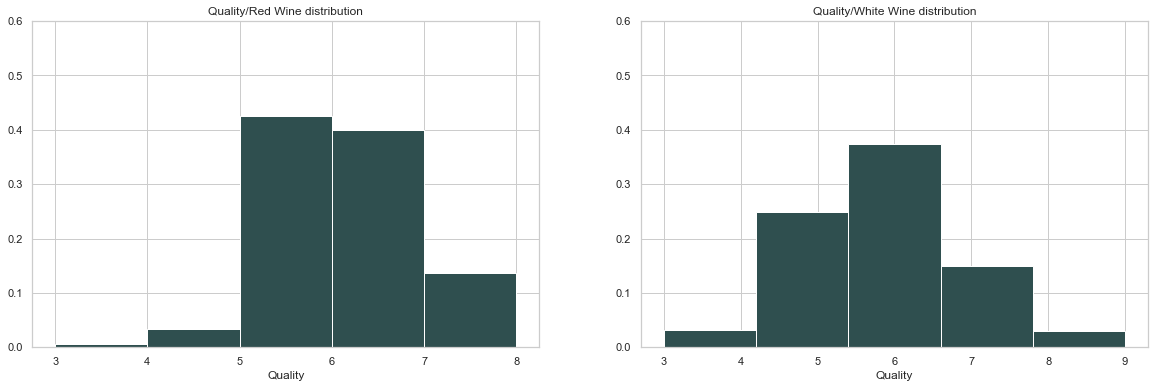

In [51]:
grouped = pd.DataFrame( wine_quality ).groupby("wine_type")
bins = 5
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(grouped["quality"].get_group( "Red Wine" ),bins=bins,color="darkslategray",density=True)
axes.set_title("Quality/Red Wine distribution")
axes.set_xlabel("Quality")
axes.set_ylim((0,.6))

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["quality"].get_group( "White Wine" ),bins=bins,color="darkslategray",density=True)
axes.set_title("Quality/White Wine distribution")
axes.set_xlabel("Quality")
axes.set_ylim((0,.6))

plt.show()
plt.close()

White Wine vs Quality appears to be normally distributed.  
Red Wine vs Quality is not as normally distributed, with very few graded 3 and 4, with over 80% of the grades going to 5 and 6.  

**EDA for Quality vs fixed_acidity**

Lets look at the correlation between quality and fixed acidity

In [52]:
def correlation(data, x, y):
    print("Correlation coefficients:")
    print( "r   =", stats.pearsonr(data[x], data[y])[0])
    print( "rho =", stats.spearmanr(data[x], data[y])[0])

In [53]:
correlation( wine_quality, "fixed_acidity", "quality" )

Correlation coefficients:
r   = -0.07674320790961987
rho = -0.0981544319402152


There is a small negative correlation with quality and fixed acidity.  
This is surprising, as it is contrary to our expectations.

In [54]:
def restyle_boxplot(patch):
    ## change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    ## change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    ## change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    ## change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

    for box in patch["boxes"]:
        box.set( facecolor='#FFFFFF', alpha=0.5)


In [55]:
def multiboxplot( input_data, numeric, categorical, skip_data_points=True):
    data = pd.DataFrame( input_data.copy() )
    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    grouped = data.groupby(categorical)
    labels = pd.unique(data[categorical].values)
    labels.sort()
    grouped_data = [grouped[numeric].get_group( k) for k in labels]
    patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)
    restyle_boxplot( patch)

    if not skip_data_points:
        for i, k in enumerate(labels):
            subdata = grouped[numeric].get_group( k)
            x = np.random.normal(i + 1, 0.01, size=len(subdata))
            axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

    axes.set_xlabel(categorical)
    axes.set_ylabel(numeric)
    axes.set_title("Distribution of {0} by {1}".format(numeric, categorical))

    plt.show()
    plt.close()

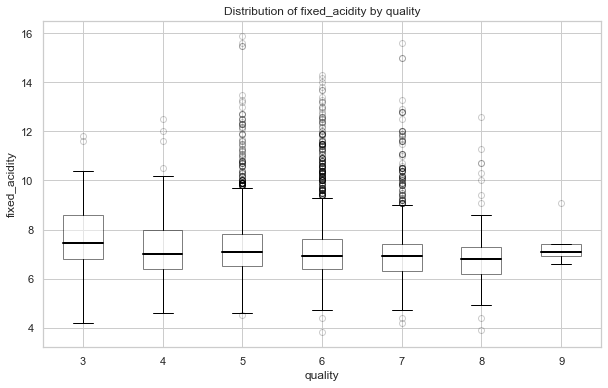

In [56]:
multiboxplot( wine_quality, "fixed_acidity", "quality" )

It would appear that most of the wines have a fixed acidity around 7, with a negative trend from 3 to 8, with wines graded 9 having an increase.

**EDA for Quality vs volatile_acidity**

We will expect a negative correltion between quality and volatile acidity

In [57]:
correlation( wine_quality, "volatile_acidity", "quality" )

Correlation coefficients:
r   = -0.2656994776114679
rho = -0.2578059010719201


There is a moderate negative correlation between quality and volative acidity, as expected.  

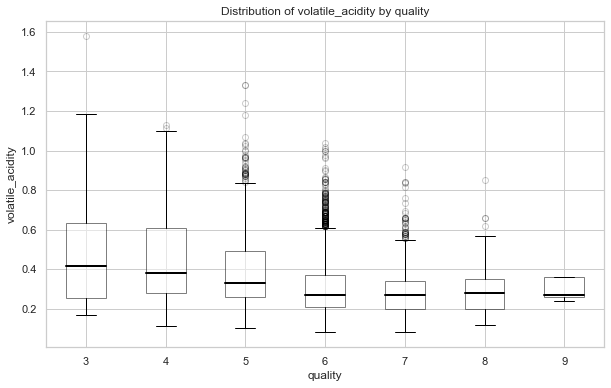

In [58]:
multiboxplot( wine_quality, "volatile_acidity", "quality" )

Wines with a lower quality tend to have more VA, with the higher the quality having a tighter and tighter range.  

**EDA for Quality vs citric_acid**

We are expecting a positive correlation with quality and citric acid.

In [59]:
correlation( wine_quality, "citric_acid", "quality" )

Correlation coefficients:
r   = 0.08553171718367847
rho = 0.10571082724003253


There is a very slight positive correlation with quality and citric acid.  

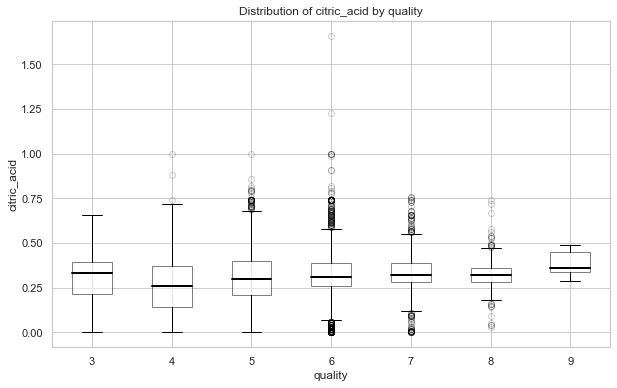

In [60]:
multiboxplot( wine_quality, "citric_acid", "quality" )

There are lots of outliers with citric acid and quality at 6.  
The trend is slight, but we can see a positive trend with higher quality wines having more citric acid.  

**EDA for Quality vs residual_sugar**

We expect to see a positive correlation with RS and quality

In [61]:
correlation( wine_quality, "residual_sugar", "quality" )

Correlation coefficients:
r   = -0.03698048458576945
rho = -0.016890589768127497


To our surprise we found a very weak negative correlation.  

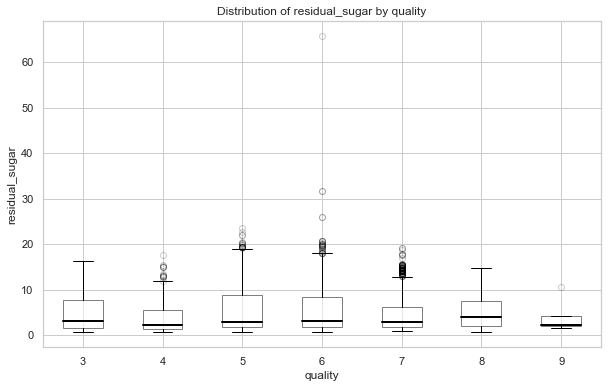

In [62]:
multiboxplot( wine_quality, "residual_sugar", "quality" )

It would appear that the "middle quality" wines have a higher concentration of residual sugar, with both higher and lower quality wines having less Residual Sugar.  

**EDA for Quality vs chlorides**

We expect a negative correlation between sodium chloride and quality

In [63]:
correlation( wine_quality, "chlorides", "quality" )

Correlation coefficients:
r   = -0.20066550043510206
rho = -0.2950542473117704


There is a weak correlation between chlorides and quality, as expected.  

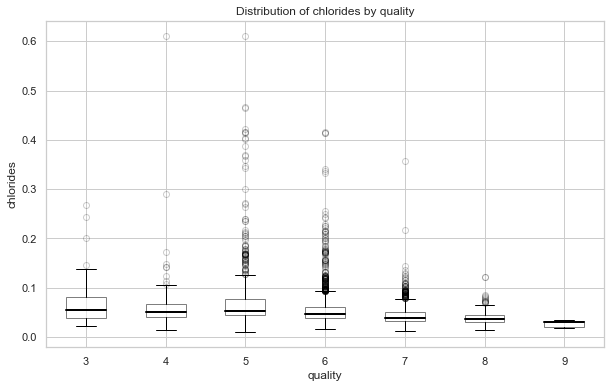

In [64]:
multiboxplot( wine_quality, "chlorides", "quality" )

The higher quality wines graded 8 and 9 have a much lower trend of sodium chlorides.  
The wines graded 3 had less outliers than almost all of the other qualities except 9, with the second largest quartile range.  

**EDA for Quality vs free_sulfur_dioxide**

Free sulfur dioxide should have a positive correlation at lower concentrations, and a negative correlation at higher concentrations.  

In [65]:
correlation( wine_quality, "free_sulfur_dioxide", "quality" )

Correlation coefficients:
r   = 0.05546305861663264
rho = 0.08686507174193496


There is a very weak positive correlation with free sulfur dioxide.  This makes sense as free SO2 keeps a wine clean and fresh.  

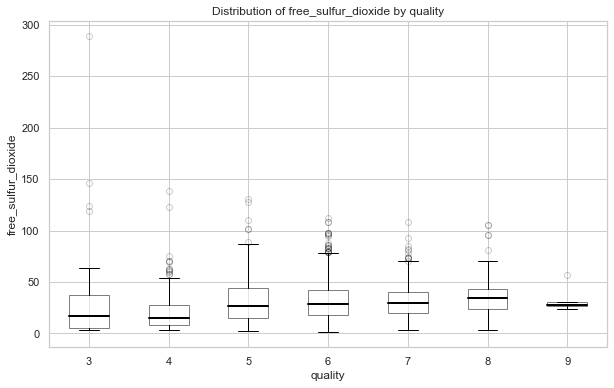

In [66]:
multiboxplot( wine_quality, "free_sulfur_dioxide", "quality" )

Wines graded as quality 9 had the tightest quartile range and least outliers, most likely due to a lack of faults.  
Looking at the median lines for each quality we can see a positive trend.  

**EDA for Quality vs total_sulfur_dioxide**

Based on our domain knowledge we would expect a negative correlation between total SO2 and quality

In [67]:
correlation( wine_quality, "total_sulfur_dioxide", "quality" )

Correlation coefficients:
r   = -0.04138545385560878
rho = -0.05477719627616353


There is a very weak negative correlation with total sulfur dioxide and quality

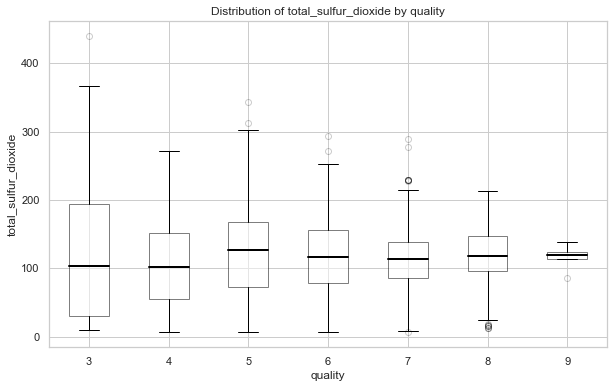

In [68]:
multiboxplot( wine_quality, "total_sulfur_dioxide", "quality" )

We can see a clear trend where the lower quality wines have a greater range in their total SO2 concentrations, with the higher quality wines having a tighter range.  
This would indicate that the lower quality wines need to use more Sodium Dioxide to correct for faults in their wine.  

**EDA for Quality vs sulphates**

Potassium Sulphates help keep a wine fresh and clean, so we expect a positive correlation with quality.  

In [69]:
correlation( wine_quality, "sulphates", "quality" )

Correlation coefficients:
r   = 0.03848544587651446
rho = 0.029830500122569492


There is a very weak positive correlation with sulphates and quality.  

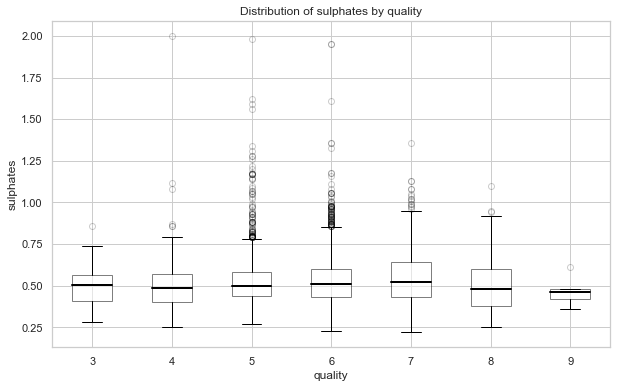

In [70]:
multiboxplot( wine_quality, "sulphates", "quality" )

As sulphates are also used to help cover up and correct for wine faults, it is not surprising to see the lowest median/IQR with wines graded 9.  
Its surprising to us how the lowest graded wines of 3 had the second tightest IRQ.  

**EDA for Quality vs density**

People prefer wines that have the density of water,  so we would expect quality to decrease as the density falls below 1 or above 1 g/cm^3.  

In [71]:
correlation( wine_quality, "density", "quality" )

Correlation coefficients:
r   = -0.30585790606941426
rho = -0.322806048360933


There is a moderately negative correlation with density and quality.  

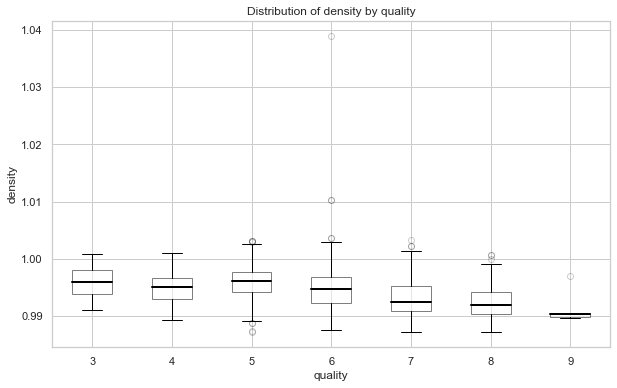

In [72]:
multiboxplot( wine_quality, "density", "quality" )

The medians for each quality grade is below 1, indicating that the wines in this sample have a higher alcohol than residual sugar content.  
As none of the wines have an RS above 70, none of the wines in our sample could be classified as "sweet".  

**EDA for Quality vs pH**

Based on our domain knowledge we would expect a positive correlation with pH and quality

In [73]:
correlation( wine_quality, "pH", "quality" )

Correlation coefficients:
r   = 0.019505703714435857
rho = 0.03253771558545041


There is a very weak correlation with pH and quality

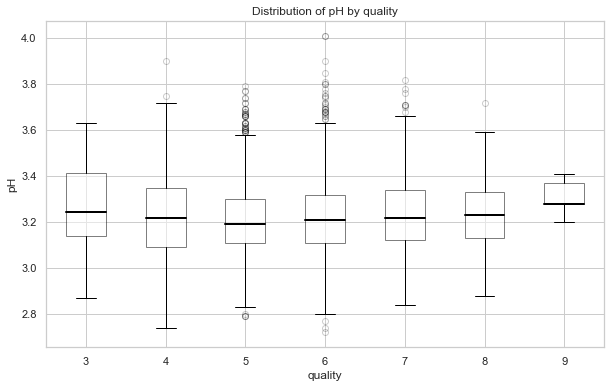

In [74]:
multiboxplot( wine_quality, "pH", "quality" )

There appears to be less variation with pH and quality at the lower and upper ends of quality.  

**EDA for Quality vs alcohol**

Alcohol helps release a wines aromatics, which helps bring out the good characteristics of wine.  
Unfortunately, this also means that a high alcohol content will also make the faults more apparent.  

In [75]:
correlation( wine_quality, "alcohol", "quality" )

Correlation coefficients:
r   = 0.44431852000765415
rho = 0.44692547881435385


There is a moderate positive correlation with alcohol and quality.  

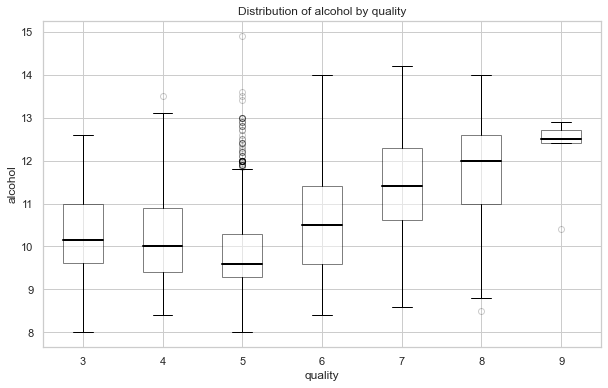

In [76]:
multiboxplot( wine_quality, "alcohol", "quality" )

Quality 9 had the highest median and tightest IQR, though this could be influenced by how white wines were the only ones graded as 9.  
Quality 5 had the lowest median, yet the most amount of higher outliers.  
There is a clear positive trend from quality 5 to 9 as the alcohol content increases.  

**Checking for Multicollinearity**

Based on our domain knowledge there is potential for multicollinearity between several variables.  
While not of major concern as every variable is known and accounts for different physicochemical properties, we want to check the correlations between our potential culprits.  
A pearsons r above 0.5 indicates potential multicollinearity.  

In [77]:
def correlations(data, y, xs):
    rs = []
    rhos = []
    for x in xs:
        r = stats.pearsonr(data[y], data[x])[0]
        rs.append(r)
        rho = stats.spearmanr(data[y], data[x])[0]
        rhos.append(rho)
    return pd.DataFrame({"feature": xs, "r": rs, "rho": rhos})

Total Sulfur Dioxide is composed of free and bound SO2, so inherently Total SO2 should be highly correlated with Free SO2.  
Sulphates produce SO2 which can become free or bound.  

In [78]:
correlations( wine_quality, "total_sulfur_dioxide", ["free_sulfur_dioxide", "sulphates"])

,feature,r,rho
0,free_sulfur_dioxide,0.720934,0.741438
1,sulphates,-0.275727,-0.256745


Free SO2 has a pearson's r of 0.72, which shows that there is strong colinearity between free and total SO2.  
This was expected, and shall be noted as we continue our analysis.  

pH is a logrithmic scale from 0 to 14 with 0 indicating acidity.  Thus any chemical compound which acts as an acid or base will effect the pH of a wine.  

In [79]:
correlations( wine_quality, "pH", ["fixed_acidity", "volatile_acidity", "citric_acid", "free_sulfur_dioxide", "total_sulfur_dioxide", "sulphates"])

,feature,r,rho
0,fixed_acidity,-0.252700,-0.250044
1,volatile_acidity,0.261454,0.194876
2,citric_acid,-0.329808,-0.285905
3,free_sulfur_dioxide,-0.145854,-0.164699
4,total_sulfur_dioxide,-0.238413,-0.242719
5,sulphates,0.192123,0.254263


None of the variables had a pearsons r above 0.5.  
What is interesting, is that Volatile Acidity shows the opposite correlation then expected.  

The density of a liquid is effected by any chemical compound which has a density above or below 1g/cc.  
Lets check the correlations with every compound in our analysis.  

In [80]:
correlations( wine_quality, "density", ["pH", "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "sulphates", "alcohol"])

,feature,r,rho
0,pH,0.011686,0.011777
1,fixed_acidity,0.458910,0.434056
2,volatile_acidity,0.271296,0.261437
3,citric_acid,0.096154,0.065690
4,residual_sugar,0.552517,0.526664
5,chlorides,0.362615,0.590729
6,free_sulfur_dioxide,0.025717,0.005841
7,total_sulfur_dioxide,0.032395,0.061540
8,sulphates,0.259478,0.274792
9,alcohol,-0.686745,-0.699442


Alcohol had the strongest correlation with -0.687, which is expected as it is the only variable to have a density lower than water.  
Residual Sugar had a correlation of 0.55, which was expected along with alcohol based on our domain knowledge.  
Fixed Acidity had a correlation of 0.46, while not above 0.5 this was a higher correlation than expected and is worth noting.  

**Check for outliers**

Based on our EDA we expect potential outliers to exist for:  volatile acidity, citric acid, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, density.

To check for outliers we will examine points which are below Q1 - 1.5 x IQR and above Q3 + 1.5 x IQR.  

In [81]:
def outlier_check( input_data ):
    dataset = input_data.copy()
    Q1 = np.percentile( dataset, 25)
    Q3 = np.percentile( dataset, 75)
    IQR = Q3 - Q1
    outliers = []
    for value in dataset:
        if value < Q1 - 1.5 * IQR:
            outliers.append( value )
        elif value > Q3 + 1.5 * IQR:
            outliers.append( value )
    return outliers

In [82]:
outliers_VA = outlier_check( wine[ "volatile_acidity" ] )

In [83]:
outliers_citric = outlier_check( wine[ "citric_acid" ] )

In [84]:
outliers_chlorides = outlier_check( wine[ "chlorides" ] )

In [85]:
outliers_free_SO2 = outlier_check( wine[ "free_sulfur_dioxide" ] )

In [86]:
outliers_total_SO2 = outlier_check( wine[ "total_sulfur_dioxide" ] )

In [87]:
outliers_sulphates = outlier_check( wine[ "sulphates" ] )

In [88]:
outliers_density = outlier_check( wine[ "density" ] )

In [89]:
print( len( outliers_citric ), "potential outliers for Citric Acid")
print( len( outliers_VA ), "potential outliers for Volatile Acidity")
print( len( outliers_chlorides ), "potential outliers for Chlorides")
print( len( outliers_sulphates ), "potential outliers for Sulphates")
print( len( outliers_free_SO2 ), "potential outliers for Free Sulfur Dioxide")
print( len( outliers_total_SO2 ), "potential outliers for Total Sulfur Dioxide")
print( len( outliers_density ), "potential outliers for Density")

509 potential outliers for Citric Acid
377 potential outliers for Volatile Acidity
286 potential outliers for Chlorides
191 potential outliers for Sulphates
62 potential outliers for Free Sulfur Dioxide
10 potential outliers for Total Sulfur Dioxide
3 potential outliers for Density


In [90]:
print("Citric Acid has", len( outliers_citric ), "potential outliers.")
print("Volatile Acidity has", len( outliers_VA ), "potential outliers.")
print("Chlorides has", len( outliers_chlorides ), "potential outliers.")
print("Sulphates has", len( outliers_sulphates ), "potential outliers.")
print("Free Sulfur Dioxide has", len( outliers_free_SO2 ), "potential outliers.")
print("Total Sulfur Dioxide has", len( outliers_total_SO2 ), "potential outliers.")
print("Density has", len( outliers_density ), "potential outliers.")

Citric Acid has 509 potential outliers.
Volatile Acidity has 377 potential outliers.
Chlorides has 286 potential outliers.
Sulphates has 191 potential outliers.
Free Sulfur Dioxide has 62 potential outliers.
Total Sulfur Dioxide has 10 potential outliers.
Density has 3 potential outliers.


We have decided to keep all of the outliers as they fell within a plausable range, and ignoring outliers can lead to fragile models which lack robustness.

## Modeling

**Null Model**

The Null model (also known as the mean or baseline model) is a simple model based on the mean and standard deviation of our target variable.  We will use this to compare the effectiveness of the models we develop.  

In [91]:
def null_model( dataset, target_x = None, prediction_error = False, distribution = "normal", verbose = True, return_values = False ):
    input_data = dataset.copy()
    try:
        y_mean = np.mean( input_data )
        y_stndev = np.std( input_data )
        lower_bound_95 = y_mean - 1.96 * y_stndev
        upper_bound_95 = y_mean + 1.96 * y_stndev
    except:
        return print( "There was an error with reading in the data" )

    if verbose is True:
        print( "mean:", y_mean,  ", standard deviation: ",  y_stndev )
        print( "Which gives us a 95 percent chance for a score to fall between (",  lower_bound_95,  ", ",  upper_bound_95,  ").")

    if return_values is True:
        return y_mean, y_stndev

    if prediction_error is True:
        #   Create simulated data using monte carlo sampling for the specific distribution
        if distribution == "normal":
            simulated_data = [y_mean + r * y_stndev for r in np.random.standard_normal( len( input_data ) ) ]
        elif distribution == "gauss":
            simulated_data = [y_mean + r * y_stndev for r in np.random.normal( len( input_data ) ) ]
        elif distribution == "exponential":
            simulated_data = [y_mean + r * y_stndev for r in np.random.exponential( len( input_data ) ) ]
        elif distribution == "gamma":
            simulated_data = [y_mean + r * y_stndev for r in np.random.gamma( len( input_data ) ) ]
        else:
            #   To add more distributions, refer to:  https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator
            return print("invalid distribution selected")

        prediction_error = []
        if target_x is None:
            for counter_i in range( len( input_data ) ):
                prediction_error.append( input_data[counter_i] - simulated_data[counter_i] )
            total_error = np.sum([np.abs(e) for e in prediction_error])
            avg_prediction_error = total_error / len(prediction_error)
            if verbose is True:
                print("Our prediction of the actual data compared to sampled data is off by", avg_prediction_error, "on average.")
            if return_values is True:
                return avg_prediction_error, total_error

        elif isinstance(target_x, int) or isinstance(target_x, float) is True:
            actual_error = []
            for counter_i in range( len( simulated_data ) ):
                prediction_error.append( target_x - simulated_data[counter_i] )
            for counter_i in range( len( input_data ) ):
                actual_error.append( target_x - input_data[counter_i] )
            total_prediction_error = np.sum([np.abs(e) for e in prediction_error])
            avg_prediction_error = total_prediction_error / len(prediction_error)
            total_actual_error = np.sum([np.abs(e) for e in actual_error])
            avg_actual_error = total_actual_error / len(actual_error)
            if verbose is True:
                print("Our prediction of", target_x, "is off by", avg_prediction_error, "on average.")
                print("Our value of", target_x, "is actually off by an average of", avg_actual_error, "%.")
        else:
            return print( "Error:  target_x for prediction_error recevied an incompatible value.  It should receive an integer, float, or null." )

In [92]:
null_mean, null_sd = null_model( wine_quality['quality'], return_values = True, verbose = False )

In [93]:
null_model( wine_quality['quality'], prediction_error = True, return_values = False )

mean: 5.818377712790519 , standard deviation:  0.8731880644450568
Which gives us a 95 percent chance for a score to fall between ( 4.106929106478208 ,  7.52982631910283 ).
Our prediction of the actual data compared to sampled data is off by 0.9769175954502055 on average.


The null model does not have a coefficient of determination (R^2) so we will use the standard deviation (error) to compare it against our new models.  

**Linear Regression**

We have tweaked the regression models for bayesian inference, and will load those functions with the models.py file.  

In [94]:
import models

**'All-in' model with Indicator Variables**

Our data is independently and identically distributed, allowing us to use the bootstrap method in creating posterior distributions of our models given the data.  

In [95]:
model_all = "quality ~ Red_Wine + White_Wine + fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol"
results_all = models.bootstrap_linear_regression(model_all, data = pd.DataFrame( wine_quality ) )
models.describe_bootstrap_lr(results_all)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,69.71,48.59,95.92
Red_Wine,$\beta_{1}$,35.04,24.46,48.15
White_Wine,$\beta_{2}$,34.68,24.14,47.77
fixed_acidity,$\beta_{3}$,0.09,0.05,0.12
volatile_acidity,$\beta_{4}$,-1.49,-1.64,-1.35
citric_acid,$\beta_{5}$,-0.06,-0.19,0.09
residual_sugar,$\beta_{6}$,0.06,0.05,0.08
chlorides,$\beta_{7}$,-0.76,-1.39,-0.17
free_sulfur_dioxide,$\beta_{8}$,0.00,0.00,0.01


The beta coefficients for our model match that of our CLD, with density, chlorides, total sulfur dioxide and volatile_acidity all trending negative.  
free_sulfur_dioxide and total_sulfur_dioxide have an almost beta coefficients, this makes sense as SO2 helps keep a wine clean and fresh in the right quantities, but if there is too much SO2 it gives off a distinct and chemically aroma and taste.  
Citric Acid has a negative beta coefficient which surprised us, but it matches our correlations from our EDA. This could be influenced by regional preferences.  

In [96]:
def plot_residuals( input_dataset, result, variables = None, figure_size = (30, 30) ):
    dataset = pd.DataFrame( input_dataset.copy() )
    if variables == None:
        variables = pd.DataFrame( dataset.copy() ).columns.values.tolist()
    figure = plt.figure( figsize = figure_size )
    plots = len(variables)
    rows = (plots // 3) + 1
    for i, variable in enumerate(variables):
        axes = figure.add_subplot(rows, 3, i + 1)

        keyed_values = sorted(zip( pd.DataFrame( dataset[variable]).values, result["residuals"]), key=lambda x: x[0] )
        residuals = [x[1][0] for x in keyed_values]

        axes.plot( list( range(0, result["n"])), residuals, '.', color="dimgray", alpha=0.75 )
        axes.axhline(y = 0.0, xmin=0, xmax = result["n"], c = "firebrick", alpha=0.5)
        axes.set_title(variable + " v. residuals")

    plt.show()
    plt.close()

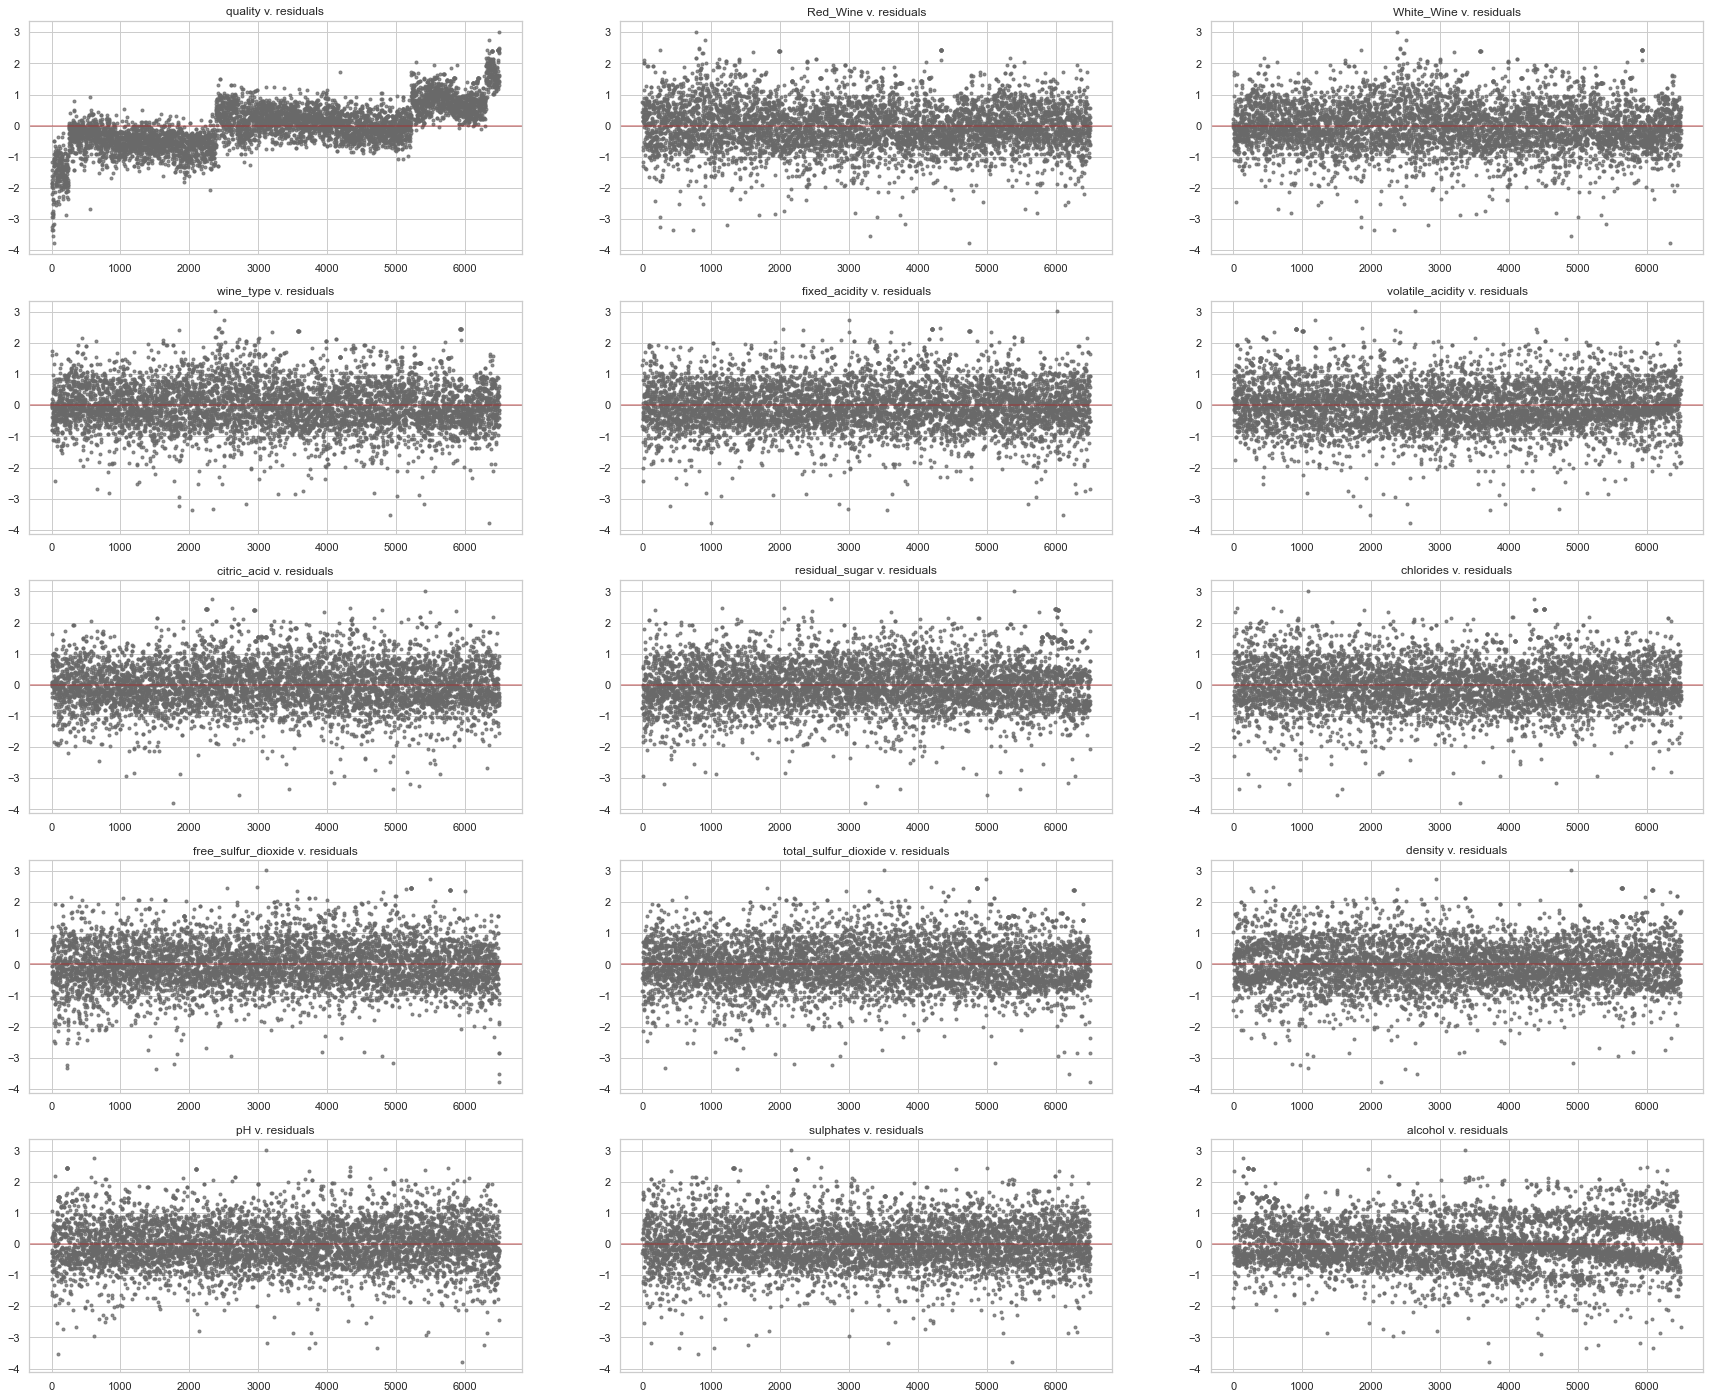

In [97]:
plot_residuals( wine_quality, results_all )

Most of our residuals meet the assumptions of Ordinary Least Squares by being centered around zero and having constant variance.  
Quality is showing clear signs of violation as the residuals are not centered around zero in the lower and higher regions, and the variance is not constant with greater error in the lower and higher regions.  This is most likely to do with the fact that quality is an ordinal discrete variable.  Possible fixes might include breaking the ranks into indicator variables, or creating a category based on a condition such as quality more than 7, and performing logistic regression.  
Alcohol shows some kind of trend through out it, with a bit of an over all trend.  We shall try transformations to correct this.
volatile acidity, and density show signs of patterns within their residuals, but are not so severe.  

We will transform our data to find a transformation which corrects OLS assumption violations.

In [98]:
def transform_data( dataset, variable ):
    dataset[ variable + "_log"] = np.log( dataset[ variable ] )
    dataset[ variable + "_log10"] = np.log10( dataset[ variable ] )
    dataset[ variable + "_log2"] = np.log2( dataset[ variable ] )
    dataset[ variable + "_sq"] = dataset[ variable ] ** 2
    dataset[ variable + "_cube"] = dataset[ variable ] ** 3
    dataset[ variable + "_quad"] = dataset[ variable ] ** 4
    dataset[ variable + "_sqrt"] = dataset[ variable ] ** ( 1 / 2 )
    dataset[ variable + "_cuberoot"] = dataset[ variable ] ** ( 1 / 3 )
    dataset[ variable + "_quadroot"] = dataset[ variable ] ** ( 1 / 4 )
    dataset[ variable + "_recip"] = 1 /  dataset[ variable ]
    dataset[ variable + "_inverse"] = -dataset[ variable ]
    dataset[ variable + "_centered"] = dataset[ variable ] - np.mean( dataset[ variable ] )
    dataset[ variable + "_stnd"] = ( dataset[ variable ] - np.mean( dataset[ variable ] ) ) / np.std( dataset[ variable ] )
    dataset[ variable + "_all"] = ( 1 / dataset[ variable ].apply( np.log10 ) ** 3 ) ** ( 1/4 )
    return dataset

In [99]:
wine_transformations = wine.copy()
transform_data( wine_transformations, "quality")
transform_data( wine_transformations, "alcohol")
transform_data( wine_transformations, "density")
transform_data( wine_transformations, "volatile_acidity")
transform_data( wine_transformations, "fixed_acidity")
transform_data( wine_transformations, "citric_acid")

,quality,Red_Wine,White_Wine,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,...,citric_acid_cube,citric_acid_quad,citric_acid_sqrt,citric_acid_cuberoot,citric_acid_quadroot,citric_acid_recip,citric_acid_inverse,citric_acid_centered,citric_acid_stnd,citric_acid_all
0,5,1,0,Red Wine,7.4,0.70,0.00,1.9,0.076,11.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,inf,-0.00,-0.318633,-2.192833,0.0
1,5,1,0,Red Wine,7.8,0.88,0.00,2.6,0.098,25.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,inf,-0.00,-0.318633,-2.192833,0.0
2,5,1,0,Red Wine,7.8,0.76,0.04,2.3,0.092,15.0,...,0.000064,0.000003,0.200000,0.341995,0.447214,25.000000,-0.04,-0.278633,-1.917553,NaN
3,6,1,0,Red Wine,11.2,0.28,0.56,1.9,0.075,17.0,...,0.175616,0.098345,0.748331,0.824257,0.865062,1.785714,-0.56,0.241367,1.661085,NaN
4,5,1,0,Red Wine,7.4,0.70,0.00,1.9,0.076,11.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,inf,-0.00,-0.318633,-2.192833,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6,0,1,White Wine,6.2,0.21,0.29,1.6,0.039,24.0,...,0.024389,0.007073,0.538516,0.661911,0.733837,3.448276,-0.29,-0.028633,-0.197054,NaN
6493,5,0,1,White Wine,6.6,0.32,0.36,8.0,0.047,57.0,...,0.046656,0.016796,0.600000,0.711379,0.774597,2.777778,-0.36,0.041367,0.284686,NaN
6494,6,0,1,White Wine,6.5,0.24,0.19,1.2,0.041,30.0,...,0.006859,0.001303,0.435890,0.574890,0.660220,5.263158,-0.19,-0.128633,-0.885253,NaN
6495,7,0,1,White Wine,5.5,0.29,0.30,1.1,0.022,20.0,...,0.027000,0.008100,0.547723,0.669433,0.740083,3.333333,-0.30,-0.018633,-0.128234,NaN


We used the following cell to check every transformation for the target variable, and most of the possible combinations of all the transformations.  

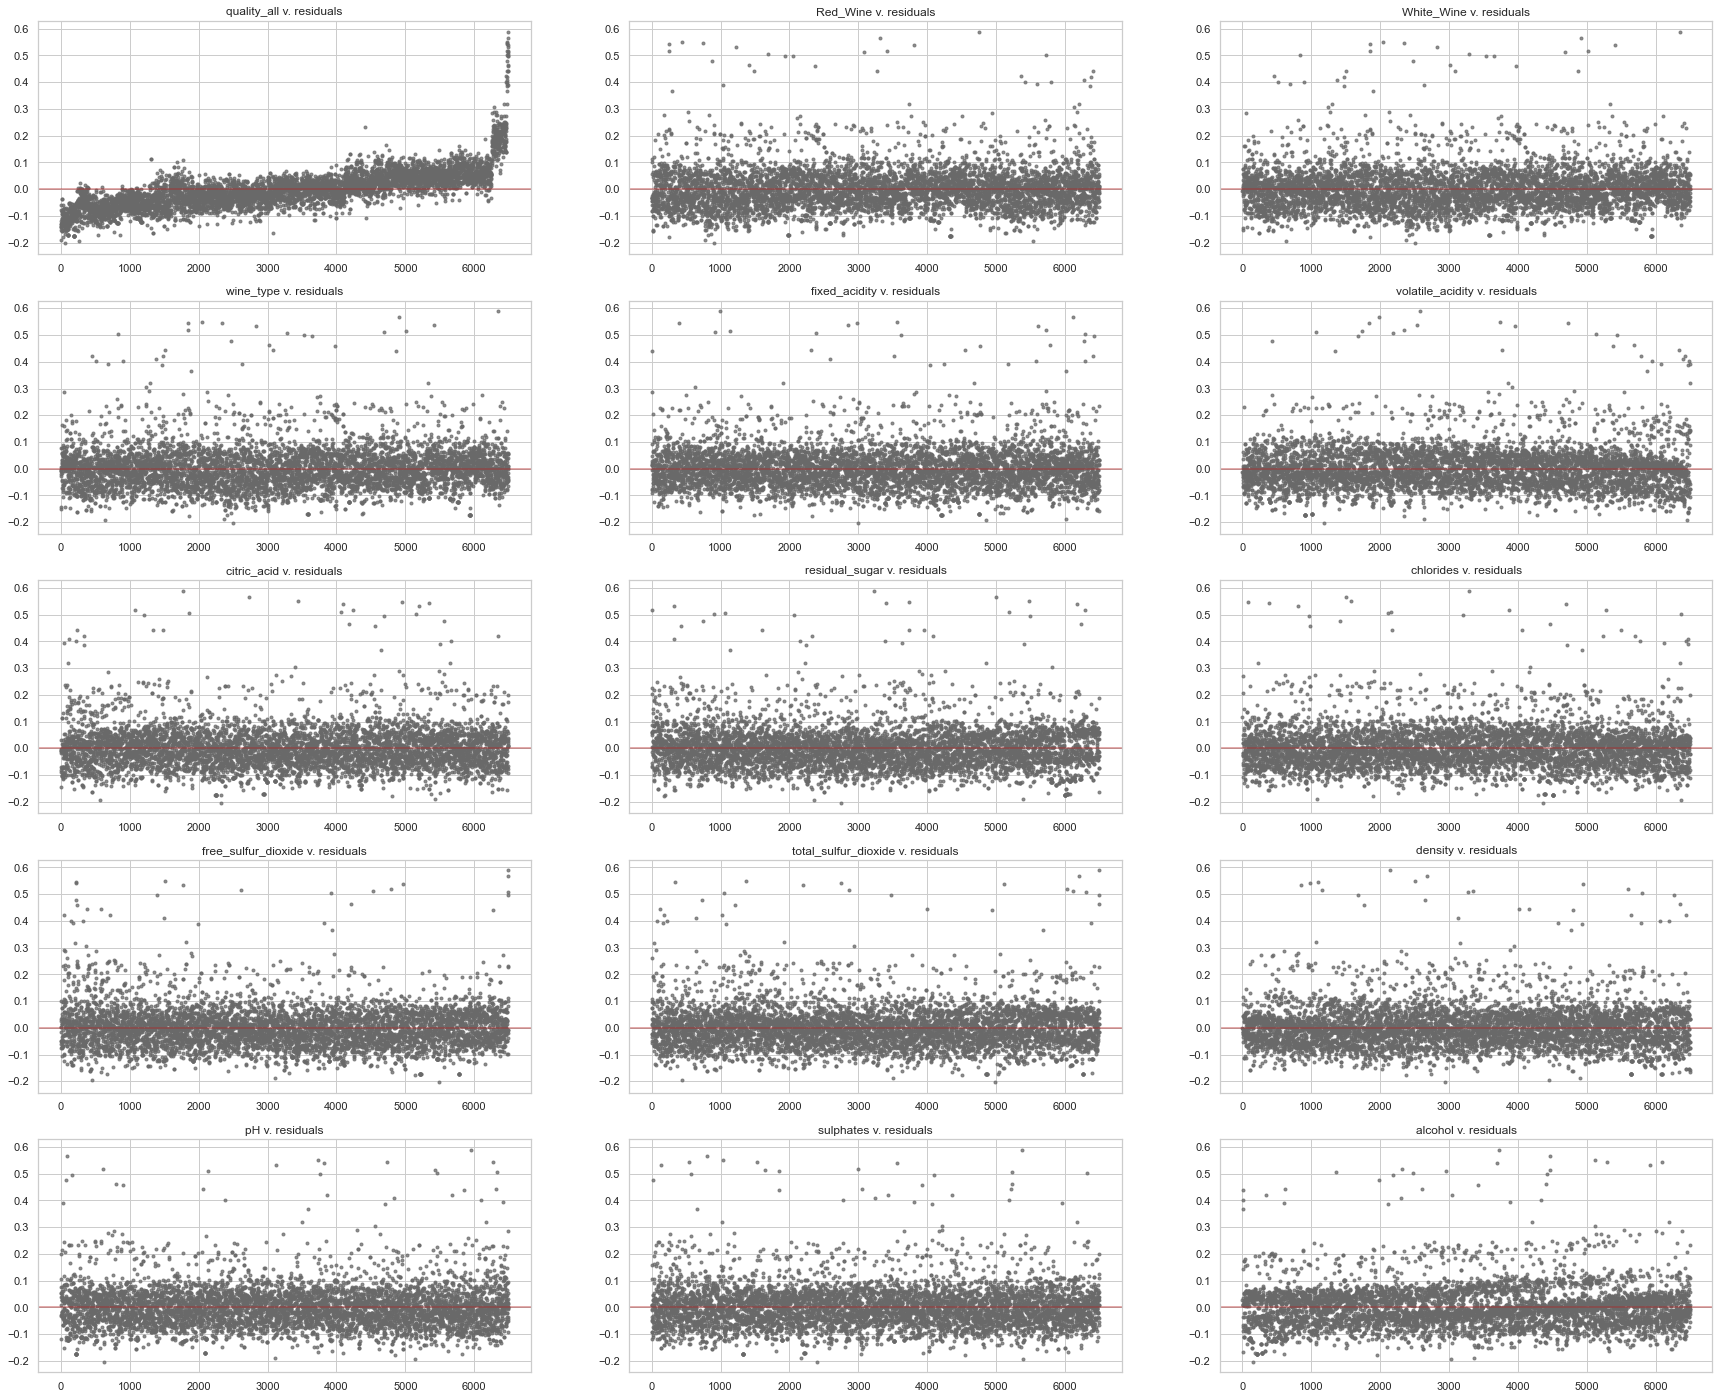

In [100]:
test_target = "quality_all"
test_regressors =  ["fixed_acidity", "volatile_acidity", "citric_acid", "density", "alcohol"]
model_test = test_target + " ~ " + test_regressors[0] + " + " + test_regressors[1] + " + " + test_regressors[2] + " + " + test_regressors[3] + " + " + test_regressors[4] + " + " + " Red_Wine + White_Wine + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + pH + sulphates"
results_test = models.bootstrap_linear_regression(model_test, data = wine_transformations )
variables_test = [test_target, 'Red_Wine', 'White_Wine', 'wine_type', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
plot_residuals( wine_transformations, results_test, variables_test )

In [101]:
models.describe_bootstrap_lr(results_test)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,-4.61,-7.54,-1.94
fixed_acidity,$\beta_{1}$,-0.01,-0.01,-0.00
volatile_acidity,$\beta_{2}$,0.17,0.15,0.19
citric_acid,$\beta_{3}$,0.01,-0.01,0.02
density,$\beta_{4}$,8.55,4.49,13.02
alcohol,$\beta_{5}$,-0.02,-0.03,-0.02
Red_Wine,$\beta_{6}$,-2.33,-3.80,-0.99
White_Wine,$\beta_{7}$,-2.28,-3.74,-0.95
residual_sugar,$\beta_{8}$,-0.01,-0.01,-0.00


In [102]:
error_test = ( 1 / ( ( 10 ** 0.07 ) ** ( 1 / 3 ) ) ) ** 4
error_test

0.8066156921766134

Combining the log power reciprocal and root transformations had a notable effect on our model's residuals, but our errors are still not centered around the mean with constant variance.
All the possible transformations were tested, some did nothing and most did worse than the original "All-In" model.  
Ultimately, we found that the untransformed variables were the best for our analysis.  

**Comparing other models**

Based on our Causal Loop Diagram and Domain Knowledge we can create a new model including the interaction effects between our variables.  

In [103]:
model_interactions = "quality ~ Red_Wine + White_Wine + fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + total_sulfur_dioxide:sulphates + total_sulfur_dioxide:free_sulfur_dioxide + total_sulfur_dioxide:pH + pH:free_sulfur_dioxide + pH:sulphates + pH:citric_acid + pH:fixed_acidity + pH:volatile_acidity + pH:alcohol + pH:chlorides + pH:residual_sugar + density:pH + density:sulphates + density:total_sulfur_dioxide + density:free_sulfur_dioxide + density:residual_sugar + density:chlorides + density:alcohol + density:volatile_acidity + density:fixed_acidity + density:citric_acid"
results_interactions = models.bootstrap_linear_regression(model_interactions, data = wine )
models.describe_bootstrap_lr( results_interactions )

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,43320760.98,-665612007.59,525386136.93
Red_Wine,$\beta_{1}$,-43321670.96,-525386940.31,665610872.21
White_Wine,$\beta_{2}$,-43321671.29,-525386940.66,665610871.87
fixed_acidity,$\beta_{3}$,-8.53,-15.62,-2.77
volatile_acidity,$\beta_{4}$,-5.65,-55.45,82.47
citric_acid,$\beta_{5}$,97.07,58.11,179.37
residual_sugar,$\beta_{6}$,-1.13,-1.90,3.54
chlorides,$\beta_{7}$,141.77,-139.69,401.37
free_sulfur_dioxide,$\beta_{8}$,1.39,0.80,1.93


Compared to our Null model, The error has decreased by 0.17, to 0.71.  
Compared to our "All-In" linear model, The error has decreased by 0.02 to 0.71, and R^2 has increased by 0.03 to 0.33.  
Although some of the beta coefficients have unexpectadly changed signs, such as residual_sugar, fixed_acidity, and density.  

From our exploration into possible models we have discovered a very simple model which has a comparable error and R-squared.  
This model is simply alcohol and volatile_acidity.  
Conceptually, this simple makes sense as VA is unwanted and causes the wine to taste and smell spoiled.  And alcohol helps release aromatics and helps deliver the flavours to our senses.  

In [104]:
model_simple = "quality ~ volatile_acidity + alcohol"
results_simple = models.bootstrap_linear_regression(model_simple, data = pd.DataFrame( wine_quality ) )
models.describe_bootstrap_lr(results_simple)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,2.93,2.77,3.08
volatile_acidity,$\beta_{1}$,-1.32,-1.42,-1.22
alcohol,$\beta_{2}$,0.32,0.30,0.33
,,,,
Metrics</strong,Mean</strong,Lo</strong,Hi</strong,
$\sigma$,0.75,0.74,0.77,
$R^2$,0.26,0.24,0.28,


Compared to our Null model, The error has decreased by 0.13, to 0.75.  
Compared to our "All-In" linear model, The error has increased by 0.02 to 0.75, and R^2 has decreased by 0.04 to 0.26.  
The beta coefficients look appropriate, according to our domain kowledge.  

We will use the "All-In" Model as it had the lowest error, highest R^2 with the appropriate beta coefficients.  

**Cross Validation**

Cross Validation is a form of backtracking, which allows us to get a general idea of how our model performs on new, unseen data.    We will split our data into a training set and a test set, and will use our linear regression model on the training set then compare the results against the test set using a loss fuction, such as SSE.  

In [105]:
def chunk(xs, n):
    k, m = divmod(len(xs), n)
    return [xs[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n)]

In [106]:
def cross_validation(algorithm, formula, data, evaluate, fold_count=10, repetitions=3):
    indices = list(range(len( data)))
    metrics = []
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[fold]
            train_indices = [idx not in fold for idx in indices]
            train_data = data.iloc[train_indices]
            result = algorithm(formula, data=train_data)
            model = result["model"]
            y, X = patsy.dmatrices(formula, test_data, return_type="matrix")
            # y = np.ravel( y) # might need for logistic regression
            results = models.summarize(formula, X, y, model)
            metric = evaluate(results)
            metrics.append(metric)
    return metrics

In [107]:
def cv_results( results ):
    error = []
    R2 = []
    for _ in range( len( results ) ):
        error.append( results[_][0])
        R2.append( results[_][1])
    error = np.mean( error )
    R2 = np.mean( R2 )
    print("error: ", error, ".  R2: ", R2)
    return error, R2

In [108]:
results_all_cv = cross_validation( models.linear_regression, model_all, pd.DataFrame( wine_quality ), lambda r: (r["sigma"], r["r_squared"]))
lr_results_cv = cv_results( results_all_cv )

error:  0.7402997312978091 .  R2:  0.29540057597733543


Finally we shall examine the learning curves for our linear regression model

In [109]:
from collections import defaultdict

def data_collection():
    result = dict()
    result[ "train"] = defaultdict( list)
    result[ "test"] = defaultdict( list)
    return result

In [110]:
 def learning_curves(algorithm, formula, data, evaluate, fold_count=10, repetitions=3, increment=1):
    indices = list(range(len( data)))
    results = data_collection()
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[ fold]
            train_indices = [idx for idx in indices if idx not in fold]
            train_data = data.iloc[train_indices]
            for i in list(range(increment, 100, increment)) + [100]: # ensures 100% is always picked.
                # the indices are already shuffled so we only need to take ever increasing chunks
                train_chunk_size = int( np.ceil((i/100)*len( train_indices)))
                train_data_chunk = data.iloc[train_indices[0:train_chunk_size]]
                # we calculate the model
                result = algorithm(formula, data=train_data_chunk)
                model = result["model"]
                # we calculate the results for the training data subset
                y, X = patsy.dmatrices( formula, train_data_chunk, return_type="matrix")
                result = models.summarize(formula, X, y, model)
                metric = evaluate(result)
                results["train"][i].append( metric)
                
                # we calculate the results for the test data.
                y, X = patsy.dmatrices( formula, test_data, return_type="matrix")
                result = models.summarize(formula, X, y, model)
                metric = evaluate(result)
                results["test"][i].append( metric)
            #
        #
    # process results
    # Rely on the CLT...
    statistics = {}
    for k, v in results["train"].items():
        statistics[ k] = (np.mean(v), np.std(v))
    results["train"] = statistics
    statistics = {}
    for k, v in results["test"].items():
        statistics[ k] = (np.mean(v), np.std(v))
    results["test"] = statistics
    return results
#

In [111]:
def results_to_curves( curve, results):
    all_statistics = results[ curve]
    keys = list( all_statistics.keys())
    keys.sort()
    mean = []
    upper = []
    lower = []
    for k in keys:
        m, s = all_statistics[ k]
        mean.append( m)
        upper.append( m + 2 * s)
        lower.append( m - 2 * s)
    return keys, lower, mean, upper

In [112]:
def plot_learning_curves( results, metric, zoom=False):
    figure = plt.figure(figsize=(10,6))

    axes = figure.add_subplot(1, 1, 1)

    xs, train_lower, train_mean, train_upper = results_to_curves( "train", results)
    _, test_lower, test_mean, test_upper = results_to_curves( "test", results)

    axes.plot( xs, train_mean, color="steelblue")
    axes.fill_between( xs, train_upper, train_lower, color="steelblue", alpha=0.25, label="train")
    axes.plot( xs, test_mean, color="firebrick")
    axes.fill_between( xs, test_upper, test_lower, color="firebrick", alpha=0.25, label="test")
    axes.legend()
    axes.set_xlabel( "training set (%)")
    axes.set_ylabel( metric)
    axes.set_title("Learning Curves")

    if zoom:
        y_lower = int( 0.9 * np.amin([train_lower[-1], test_lower[-1]]))
        y_upper = int( 1.1 * np.amax([train_upper[-1], test_upper[-1]]))
        axes.set_ylim((y_lower, y_upper))

    plt.show()
    plt.close()

In [113]:
result = learning_curves(models.linear_regression, model_all, wine, lambda r: r["sigma"])

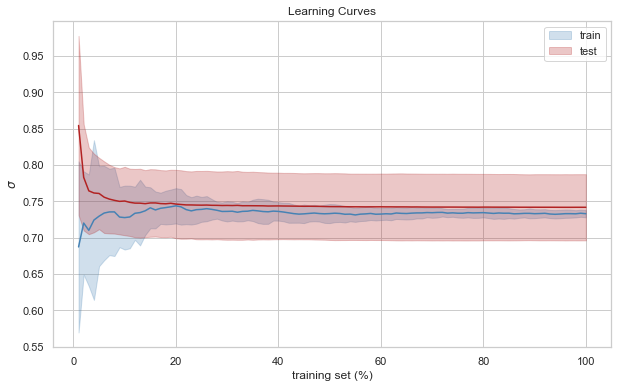

In [114]:
plot_learning_curves(result, r"$\sigma$")

Our model is suffering from high bias

## Interesting Discovery

**Logistic Regression**

Something interesting to note is how effective logistic regression could be to predict if a wine is white or red based off of its physicochemical properties.

In [115]:
model_lg = "White_Wine ~ quality + fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol"

In [116]:
result_lg = models.logistic_regression( model_lg, data = wine_quality )
models.simple_describe_lgr( result_lg )

Coefficients</strong,,Value</strong
,$\beta_{0}$,1.64
quality,$\beta_{1}$,0.04
fixed_acidity,$\beta_{2}$,-0.68
volatile_acidity,$\beta_{3}$,-8.85
citric_acid,$\beta_{4}$,1.78
residual_sugar,$\beta_{5}$,0.15
chlorides,$\beta_{6}$,-1.44
free_sulfur_dioxide,$\beta_{7}$,-0.05
total_sulfur_dioxide,$\beta_{8}$,0.06
density,$\beta_{9}$,1.50


In [117]:
result_lg_cv = cross_validation(models.logistic_regression, model_lg, wine, lambda r: (r["sigma"], r["r_squared"]))
cv_results( result_lg_cv )

error:  0.5983886440104933 .  R2:  0.9793239303069812


(0.5983886440104933, 0.9793239303069812)

These results show that there is real potential in using physicochemical properties to predict if a wine is white or red.  
We simply wanted to show this interesting discovery while exploring our data, and will not be investigating logistic regression any further in this report.

## ML Pre-Precessing

Before we can start comparing our linear regression model to Machine Learning methods we must prepare our data

In [118]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Import dataset
wine = pd.DataFrame( wine_quality )

# Drop Duplicates
wine = wine.drop_duplicates()

# Reset Index since we removed duplicates
wine = wine.reset_index(drop=True)

# Convert string class to numerical
for i in range(0, wine.shape[1]):
    if wine.dtypes[i]=='object':
        wine[wine.columns[i]] = le.fit_transform(wine[wine.columns[i]])
        
# Verify steps are done correctly
wine.head()

,quality,Red_Wine,White_Wine,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,5,1,0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,1,0,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,1,0,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,1,0,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,1,0,0,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [119]:
from sklearn.model_selection import train_test_split

#features = [ 'Red_Wine', 'White_Wine', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol' ]
features = [ 'wine_type', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol' ]

# Train, test, split the data
X = wine[features] # Features
y = wine['quality'] # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

## k-Nearest Neighbors

k-Nearest Neighbors is a non-parametric method which can be used for both regression and classification, making it a very useful Machine Learning Algorithm. 

In [120]:
import sklearn.neighbors as neighbors

In [121]:
#  Root Mean Square Error
def rmse( y, y_hat):
    return np.sqrt((1.0/len( y)) * np.sum((y - y_hat)**2))

In [122]:
def dmatrix_to_array(dmatrix):
    return np.array([row[0] for row in dmatrix])

In [123]:
def knn_cross_validation(formula, builder, data, fold_count=10, repetitions=3):
    indices = list(range(len( data)))
    metrics = {"train": [], "test": [], "rmse":[]}
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[fold]
            train_indices = [idx not in fold for idx in indices]
            train_data = data.iloc[train_indices]
            # y, X for training data
            y, X = patsy.dmatrices(formula, train_data, return_type="matrix")
            model = builder.fit(X, y)
            y_hat = model.predict(X)
            training_r_squared = (stats.pearsonr(dmatrix_to_array(y), dmatrix_to_array(y_hat))[0])**2
            metrics["train"].append(training_r_squared)
            # y, X for test data
            y, X = patsy.dmatrices(formula, test_data, return_type="matrix")
            ys = [el[0] for el in y]
            y_hat = model.predict(X)
            test_r_squared = (stats.pearsonr(dmatrix_to_array(y), dmatrix_to_array(y_hat))[0])**2
            metrics["test"].append(test_r_squared)
            metrics["rmse"].append( rmse( y, y_hat ) )
    return metrics

First we must find the best k for our model by using Validation Curves

In [174]:
test_curve = []
train_curve = []
for k in range(1, 21):
    builder = neighbors.KNeighborsRegressor(k)
    results = knn_cross_validation(model_all, builder, wine)
    test_curve.append(stats.mstats.mquantiles(results['test'], [0.025, 0.5, 0.975]))
    train_curve.append(stats.mstats.mquantiles(results['train'], [0.025, 0.5, 0.975]))

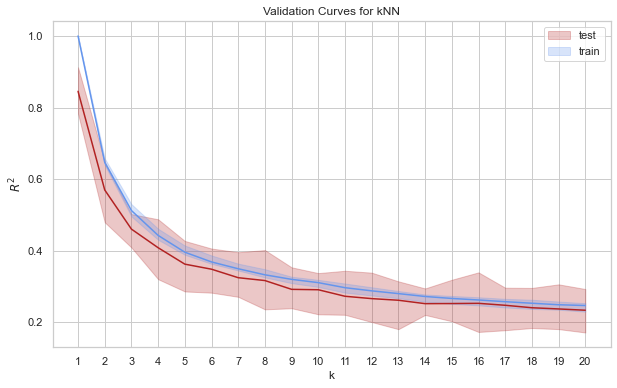

In [175]:
xs = list(range(1, 21))
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)

test_lower, test_mid, test_upper = zip(*test_curve)
train_lower, train_mid, train_upper = zip(*train_curve)

axes.fill_between(xs, test_lower, test_upper, alpha=0.25, color="firebrick", label="test")
axes.plot(xs, test_mid, color="firebrick")

axes.fill_between(xs, train_lower, train_upper, alpha=0.25, color="cornflowerblue", label="train")
axes.plot(xs, train_mid, color="cornflowerblue")

axes.set_xticks(xs)
axes.set_xticklabels([str(x) for x in xs])

axes.legend()
axes.set_title("Validation Curves for kNN")
axes.set_xlabel("k")
axes.set_ylabel("$R^2$")

plt.show()
plt.close()

It would appear that k = 1 is the best k for our model.

In [126]:
def knn_learning_curves(builder, formula, data, fold_count=10, repetitions=3, increment=1):
    indices = list(range(len( data)))
    results = data_collection()
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[ fold]
            train_indices = [idx for idx in indices if idx not in fold]
            train_data = data.iloc[train_indices]
            for i in list(range(increment, 100, increment)) + [100]: # ensures 100% is always picked.
                # the indices are already shuffled so we only need to take ever increasing chunks
                train_chunk_size = int( np.ceil((i/100)*len( train_indices)))
                train_data_chunk = data.iloc[train_indices[0:train_chunk_size]]
                # we calculate the model
                y, X = patsy.dmatrices(formula, train_data_chunk, return_type="matrix")
                model = builder.fit(X, y)
                y_hat = model.predict(X)
                training_r_squared = (stats.pearsonr(dmatrix_to_array(y), dmatrix_to_array(y_hat))[0])**2
                results["train"][i].append(training_r_squared)
                
                # y, X for test data
                y, X = patsy.dmatrices(formula, test_data, return_type="matrix")
                y_hat = model.predict(X)
                test_r_squared = (stats.pearsonr(dmatrix_to_array(y), dmatrix_to_array(y_hat))[0])**2
                results["test"][i].append(test_r_squared)
    # process results
    # Rely on the CLT...
    statistics = {}
    for k, v in results["train"].items():
        statistics[ k] = (np.mean(v), np.std(v))
    results["train"] = statistics
    statistics = {}
    for k, v in results["test"].items():
        statistics[ k] = (np.mean(v), np.std(v))
    results["test"] = statistics
    return results
#

In [176]:
result = knn_learning_curves(neighbors.KNeighborsRegressor(1), model_all, wine)

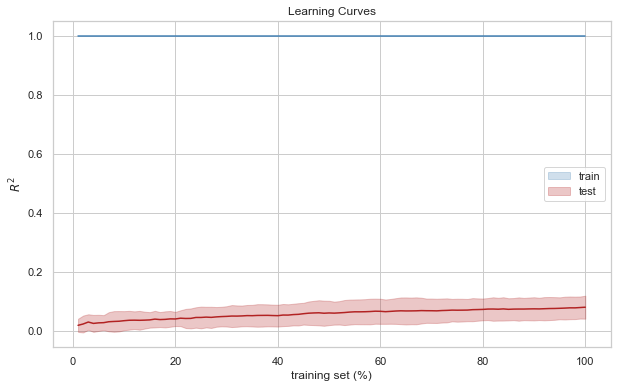

In [177]:
plot_learning_curves(result, "$R^2$")

It would appear that we may be overfitting our data.  
There looks to also be a problem with convergence for k = 1.  
k = 3 was found to start to converge, but has higher error and lower R^2.  

**Cross Validation**

We will perform 3 x 10 fold cross validation to help us understand of the generalization error of our final model by looking at the credible interval from the posterior distribution of R^2 and RMSE.  

In [178]:
builder = neighbors.KNeighborsRegressor(1)
knn_results = knn_cross_validation(model_all, builder, wine)

In [179]:
print(r"RMSE:", np.mean( knn_results['rmse'] ) )
print(r"95% CI for RMSE:", stats.mstats.mquantiles(knn_results['rmse'], [0.025, 0.975]))

RMSE: 0.3416609267829097
95% CI for RMSE: [0.23871314 0.43263813]


In [180]:
print(r"R^2:", np.mean( knn_results['test'] ) )
print(r"95% CI for R^2:", stats.mstats.mquantiles(knn_results['test'], [0.025, 0.975]))

R^2: 0.852773114514889
95% CI for R^2: [0.77538611 0.92252266]


The kNN regression RMSE is 0.32, which is over a half decrease from our linear regression model.  
The kNN regression R^2 is 0.86, which is over twice that from our linear regression model.  

This is great news.  We will now look at Decision Tree and Random Forest before comparing our models.  

## Decision Tree

Decision Trees break down a dataset into increasingly smaller and smaller subsets, while the associated decision tree is developed incrementally.  
A tree is the final result with decision and leaf nodes.  
Decision nodes have two or more branches, representing values for the attribute tested.  
Leaf nodes represents a decision on the numerical target.  
Decision trees can handle both categorical and numerical data.  
(https://www.saedsayad.com/decision_tree_reg.htm).  

In [132]:
from sklearn.tree import DecisionTreeRegressor

In [134]:
# Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=seed)

#Train the model using the training sets 
regressor.fit(X_train,y_train)
y_true_dt = np.array(y_test)
y_pred_dt = regressor.predict(X_test)

# Print Evaluation Metrics
print('Decision Tree Regressor,  R^2: %f' % regressor.score(X_test, y_test))
print('Decision Tree Regressor, RMSE: %f' % rmse(y_true_dt, y_pred_dt))

from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_true_dt, y_pred_dt))
print(np.sqrt(mean_squared_error(y_true_dt, y_pred_dt)))

Decision Tree Regressor,  R^2: -0.240804
Decision Tree Regressor, RMSE: 0.989924
-0.24080399062491464
0.9899241762310469


Decision Tree can have negative R^2 values.  
error appears to be higher than the null model.  

In [135]:
def validation_curve_dt(seed, X, y, min_depth, max_depth, test_size=0.30):
    train_scores = []
    test_scores = []
    
    for i in range(min_depth, max_depth + 1):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
        
        reg = DecisionTreeRegressor(random_state=seed, max_depth=i)
        
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_train)
        train_scores.append(rmse(y_train, y_pred))
        
        y_pred = reg.predict(X_test)
        test_scores.append(rmse(y_test, y_pred))
        
    return train_scores, test_scores

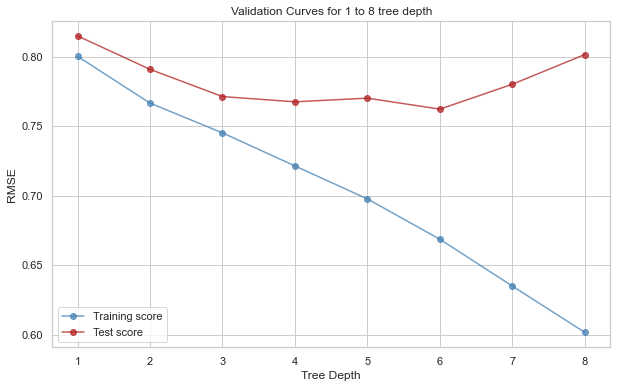

In [136]:
seed = 101
min_depth = 1
max_depth = 8
param_range = range(min_depth, max_depth + 1)
x_label = 'Tree Depth'
y_label = 'RMSE'
title = "Validation Curves for {0} to {1} tree depth".format(min_depth, max_depth)

train_scores, test_scores = validation_curve_dt(seed, X, y, min_depth, max_depth)

figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.plot(param_range, train_scores, 'o-', color="steelblue", alpha=0.75, label="Training score")
axes.plot(param_range, test_scores, "o-", color="firebrick", alpha=0.75, label="Test score")
axes.set_xlabel(x_label)
axes.set_ylabel(y_label)
axes.set_title(title)
plt.legend(loc="best")
plt.show()
plt.close()

A tree depth of 4 looks to be the best for bias/variance trade off, as we increase tree depth we tend to overfit the model.

In [137]:
from sklearn import model_selection

In [138]:
dt_results = []
for i in range(0, 3):
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)

    #Train the model using the training sets 
    regressor = DecisionTreeRegressor(random_state=seed, max_depth=4)
    regressor.fit(X_train,y_train)
    results = model_selection.cross_val_score(regressor, X, y, cv=kfold)
    dt_results = np.concatenate((dt_results, results), axis=None)

In [139]:
print(r"R^2:", np.mean( dt_results ) )
print(r"95% CI for R^2:", stats.mstats.mquantiles(dt_results, [0.025, 0.975]))

R^2: 0.2579642820253422
95% CI for R^2: [0.19796445 0.30082679]


In [140]:
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    from sklearn.model_selection import learning_curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.25,
                     color="steelblue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.25, color="firebrick")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="steelblue",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="firebrick",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    plt.close()

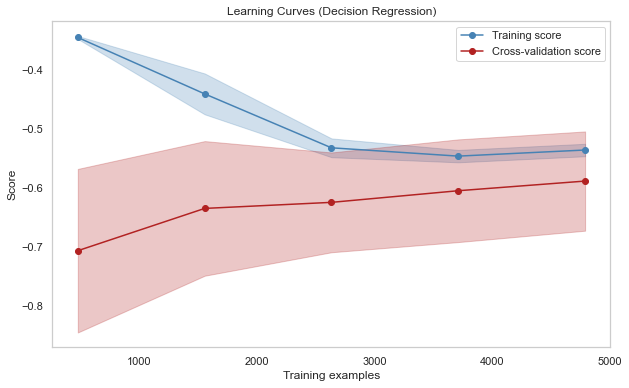

In [141]:
title = "Learning Curves (Decision Regression)"
estimator = DecisionTreeRegressor(random_state=seed, max_depth=4)
plot_learning_curve(estimator, title, X, y, cv=10, n_jobs=1)

We have high bias in this model

## Random Forest

Random Forests construct a multitude of decision trees at training time.  
For classification the output is the class selected by the most trees.  
For regression the average prediction of the individual trees is returned.  
Random Forests correct for the decision trees' habit of overfitting to their training set.  
Overfitting is when we have low bias but high variance trade off.  
(https://en.wikipedia.org/wiki/Random_forest)

In [142]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(random_state=seed, n_estimators = 100)

#Train the model using the training sets 
rfc.fit(X_train,y_train)
y_true = np.array(y_test)
y_pred = rfc.predict(X_test)

# Print Evaluation Metrics
print('Random Forest Regressor,  R^2: %f' % rfc.score(X_test, y_test) )
print('Random Forest Regressor, RMSE: %f' % rmse(y_true, y_pred) )

Random Forest Regressor,  R^2: 0.394378
Random Forest Regressor, RMSE: 0.691594


In [143]:
def validation_curve_rf(seed, X, y, min_val, max_val, step, test_size=0.30):
    train_scores = []
    test_scores = []
    
    for i in range(min_val, max_val + 10):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
        reg = RandomForestRegressor(random_state=seed, n_estimators=i)
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_train)
        train_scores.append(rmse(y_train, y_pred))
        y_pred = reg.predict(X_test)
        test_scores.append(rmse(y_test, y_pred))
    return train_scores, test_scores

In [144]:
min_val = 10
max_val = 100
step = 10
param_range = range(min_val, max_val + step)
x_label = 'Number of Trees in RandomForest'
y_label = 'RMSE'
title = "Validation Curves for {0} to {1} trees in forest".format(min_val, max_val)

train_scores, test_scores = validation_curve_rf(seed, X, y, min_val, max_val, step=200)

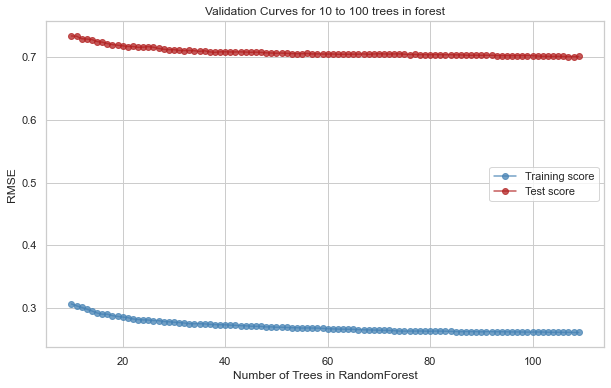

In [145]:
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.plot(param_range, train_scores, 'o-', color="steelblue", alpha=0.75, label="Training score")
axes.plot(param_range, test_scores, "o-", color="firebrick", alpha=0.75, label="Test score")
axes.set_xlabel(x_label)
axes.set_ylabel(y_label)
axes.set_title(title)
plt.legend(loc="best")
plt.show()
plt.close()

We will choose 15 trees for our random forest.

In [146]:
rf_results = []
for i in range(0, 3):
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state = seed)

    #Train the model using the training sets 
    regressor = RandomForestRegressor(random_state=seed, n_estimators = 150)
    regressor.fit(X_train,y_train)
    results = model_selection.cross_val_score(regressor, X, y, cv = kfold)
    rf_results = np.concatenate((rf_results, results), axis = None)

In [147]:
print(r"R^2:", np.mean( rf_results ) )
print(r"95% CI for R^2:", stats.mstats.mquantiles( rf_results, [0.025, 0.975]))

R^2: 0.38614666360048366
95% CI for R^2: [0.3245999  0.45159426]


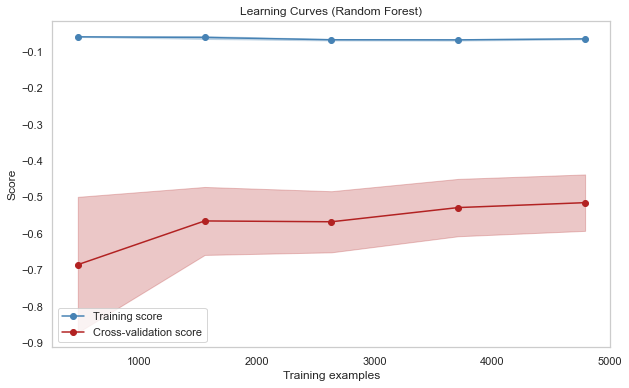

In [148]:
title = "Learning Curves (Random Forest)"
estimator_rf = RandomForestRegressor( random_state=seed )
plot_learning_curve(estimator_rf, title, X, y, cv=10, n_jobs=1)

## Model Comparison

We can now compare the 30 R^2 and error estimates from our linear regression, kNN, Decision Tree, and Random Forest models.  We can now do separate bootstrap estimates of the posterior distributions of the mean R^2 of the models and the differences in the models.

In [149]:
print( "Null Model;          Error:", null_sd)
print( "Linear Regression:   Error:", lr_results_cv[0], ",  R^2: ", lr_results_cv[1] )
print( "k-Nearest Neighbor:  Error:", np.mean( knn_results['rmse'] ), ",  R^2: ", np.mean( knn_results['test'] ) )
print( "Decision Tree:       Error:", np.sqrt(mean_squared_error(y_true_dt, y_pred_dt)), ", R^2: ", np.mean( dt_results ) )
print( "Random Forest:       Error:", rmse(y_true, y_pred), ", R^2: ", np.mean( rf_results ) )

Null Model;          Error: 0.8731880644450568
Linear Regression:   Error: 0.7402997312978091 ,  R^2:  0.29540057597733543
k-Nearest Neighbor:  Error: 0.3366935940516294 ,  R^2:  0.8571149515676227
Decision Tree:       Error: 0.9899241762310469 , R^2:  0.2579642820253422
Random Forest:       Error: 0.6915941774376532 , R^2:  0.38614666360048366


kNN Regression had the lowest error by far, and the highest R^2 of all the models.

Now we can use the bootstrap to estimate the difference of means for our 4 models:

In [150]:
def bootstrap_sample( data, f, n=100):
    result = []
    m = len( data)
    for _ in range( n):
        sample = np.random.choice( data, len(data), replace=True)
        r = f( sample)
        result.append( r)
    return np.array( result)

In [151]:
lr_bootstrap = bootstrap_sample([r[1] for r in results_all_cv], np.mean)
knn_bootstrap = bootstrap_sample(knn_results['test'], np.mean)
dt_bootstrap = bootstrap_sample(dt_results, np.mean)
rf_bootstrap = bootstrap_sample(rf_results, np.mean)
difference_knn = knn_bootstrap - lr_bootstrap
difference_dt = dt_bootstrap - lr_bootstrap
difference_rf = rf_bootstrap - lr_bootstrap

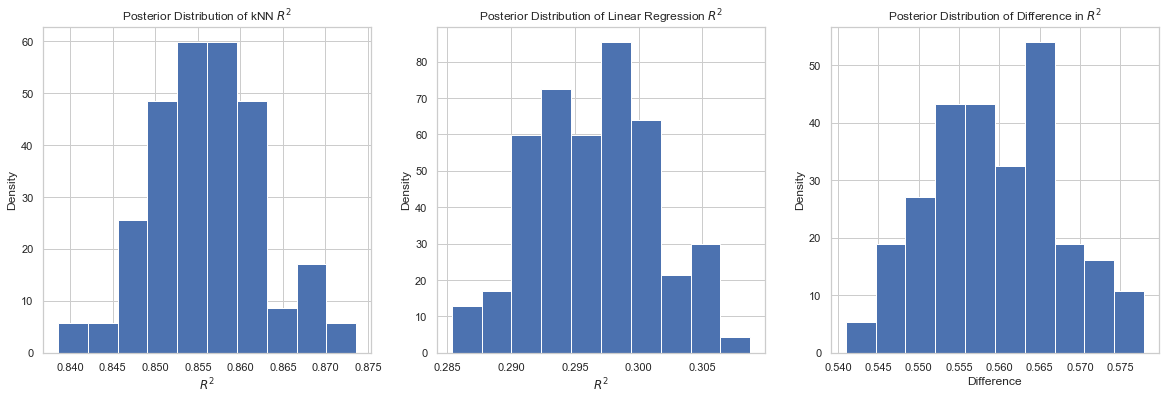

In [152]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)

axes.hist(knn_bootstrap, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$R^2$")
axes.set_title( "Posterior Distribution of kNN $R^2$")

axes = figure.add_subplot(1, 3, 2)

axes.hist(lr_bootstrap, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$R^2$")
axes.set_title( "Posterior Distribution of Linear Regression $R^2$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference_knn, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "Difference")
axes.set_title( "Posterior Distribution of Difference in $R^2$")

plt.show()
plt.close()

In [153]:
print("P(kNN >= LR)", np.mean(difference_knn >= 0))
print("P(LR > kNN)", np.mean(difference_knn < 0))

P(kNN >= LR) 1.0
P(LR > kNN) 0.0


It looks like k-Nearest Neighbors performed better than the Linear Regression model.

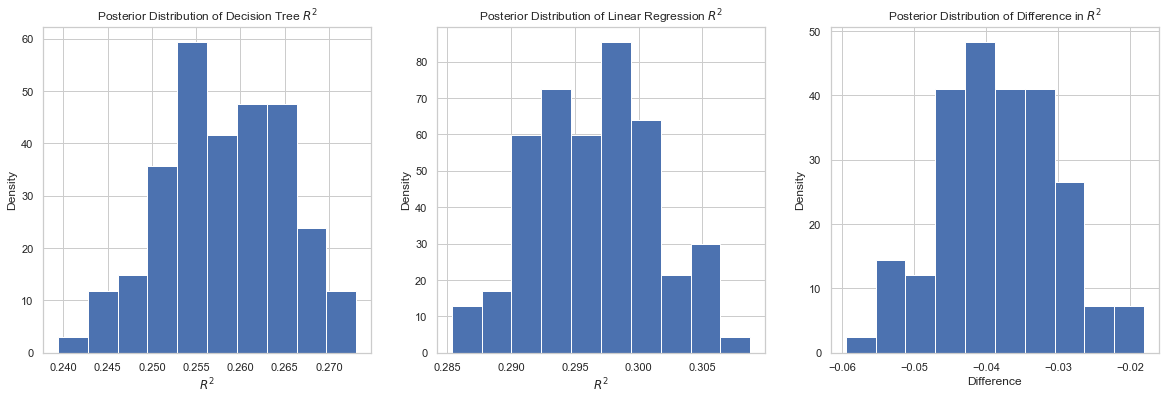

In [154]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)

axes.hist(dt_bootstrap, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$R^2$")
axes.set_title( "Posterior Distribution of Decision Tree $R^2$")

axes = figure.add_subplot(1, 3, 2)

axes.hist(lr_bootstrap, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$R^2$")
axes.set_title( "Posterior Distribution of Linear Regression $R^2$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference_dt, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "Difference")
axes.set_title( "Posterior Distribution of Difference in $R^2$")

plt.show()
plt.close()

In [155]:
print("P(DT >= LR)", np.mean(difference_dt >= 0))
print("P(LR > DT)", np.mean(difference_dt < 0))

P(DT >= LR) 0.0
P(LR > DT) 1.0


It looks like our Linear Regression model performed better than the Decision Tree Regression.

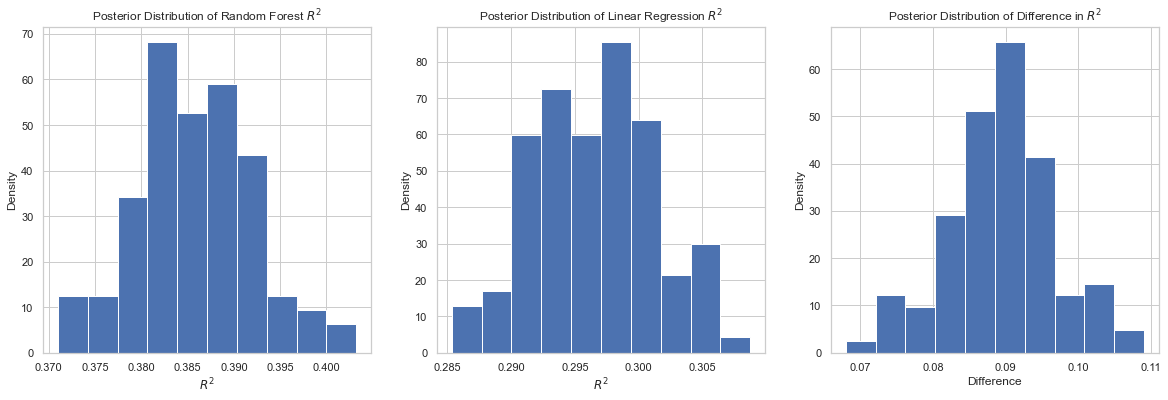

In [156]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)

axes.hist(rf_bootstrap, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$R^2$")
axes.set_title( "Posterior Distribution of Random Forest $R^2$")

axes = figure.add_subplot(1, 3, 2)

axes.hist(lr_bootstrap, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$R^2$")
axes.set_title( "Posterior Distribution of Linear Regression $R^2$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference_rf, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "Difference")
axes.set_title( "Posterior Distribution of Difference in $R^2$")

plt.show()
plt.close()

In [157]:
print("P(RF >= LR)", np.mean(difference_rf >= 0))
print("P(LR > RF)", np.mean(difference_rf < 0))

P(RF >= LR) 1.0
P(LR > RF) 0.0


It looks like Random Forest performed better than our Linear Regression model.

Lets compare k-Nearest Neighbors with Random Forest to see which performed better

In [158]:
difference_knn_rf = knn_bootstrap - rf_bootstrap

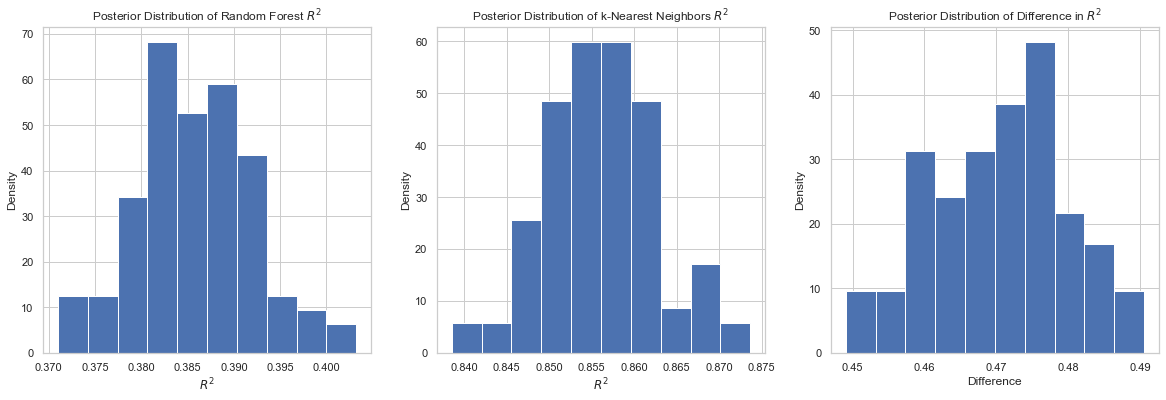

In [159]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)

axes.hist(rf_bootstrap, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$R^2$")
axes.set_title( "Posterior Distribution of Random Forest $R^2$")

axes = figure.add_subplot(1, 3, 2)

axes.hist(knn_bootstrap, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$R^2$")
axes.set_title( "Posterior Distribution of k-Nearest Neighbors $R^2$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference_knn_rf, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "Difference")
axes.set_title( "Posterior Distribution of Difference in $R^2$")

plt.show()
plt.close()

In [160]:
print("P(kNN >= RF)", np.mean(difference_knn_rf >= 0))
print("P(RF > kNN)", np.mean(difference_knn_rf < 0))

P(kNN >= RF) 1.0
P(RF > kNN) 0.0


Ultimately, it looks like k-Nearest Neighbors performed better than any of our other models.  

## Predictions

We shall make 3 predictions using k-Nearest Neighbors Regression and our Linear Regression model for comparison.  

In [193]:
# Lets fit our builder to our regression model
builder.fit( np.transpose( [ wine_quality["Red_Wine"], wine_quality["White_Wine"], wine_quality["fixed_acidity"], wine_quality["volatile_acidity"], wine_quality["citric_acid"], wine_quality["residual_sugar"], wine_quality["chlorides"], wine_quality["free_sulfur_dioxide"], wine_quality["total_sulfur_dioxide"], wine_quality["density"], wine_quality["pH"], wine_quality["sulphates"], wine_quality["alcohol"]  ] ), wine_quality["quality"] )

KNeighborsRegressor(n_neighbors=1)

In [194]:
#  A red wine with moderate alcohol content, low residual sugar.  We expect good quality.  
prediction_1 = [1, 0, 8.2, 0.25, 0.1, 2, 0.05, 20, 50, 1.0, 3.4, 0.7, 11]
print( builder.predict( [ prediction_1 ] ) )

[7.]


In [201]:
#  A white wine with alot of free sulfur dioxide, high alcohol content, and very sweet.  We are curious if the alcohol and sugar will raise its quality.  
prediction_2 = [0, 1, 6.5, 0.1, 0.2, 70, 0.1, 75, 200, 0.99, 3.1, 0.3, 14]
print( builder.predict( [ prediction_2 ] ) )

[5.]


In [202]:
#  A white wine with low alcohol, dry, citric acid, low pH, salty, high volatile acidity, acidic.  This wine has faults and should not be of good quality.
prediction_3 = [0, 1, 10, 1.1, 0.6, 1.5, 0.15, 35, 126, 1.01, 3.0, 1.1, 7]
print( builder.predict( [ prediction_3 ] ) )

[5.]


The third prediction is a unexpected, as it is a salty wine with a high concentration of volatile acidity.  